[View in Colaboratory](https://colab.research.google.com/github/abhiksark/MajorProject/blob/master/adamlr0.01.ipynb)

In [1]:
!df -BG


Filesystem     1G-blocks  Used Available Use% Mounted on
overlay             359G    6G      335G   2% /
tmpfs                 7G    0G        7G   0% /dev
tmpfs                 7G    0G        7G   0% /sys/fs/cgroup
/dev/root             2G    1G        1G  44% /opt/bin
tmpfs                 7G    1G        7G   4% /usr/lib64-nvidia
/dev/sda1           365G    8G      358G   2% /etc/hosts
shm                   1G    0G        1G   0% /dev/shm
tmpfs                 7G    0G        7G   0% /sys/firmware


In [0]:
!kill -9 -1

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.7 GB  I Proc size: 141.7 MB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from google.colab import files
uploaded = files.upload()
!pip install -U -q PyDrive ## you will have install for every colab session




Saving kaggle.json to kaggle.json


In [3]:
!mkdir /content/.kaggle
#!mv /content/.kaggle kaggle.json
#!ls
#!chmod 600 ~ kaggle.json
!mv kaggle.json /content/.kaggle
!ls /content/.kaggle/
!chmod 600 ~ /content/.kaggle/kaggle.json


kaggle.json


In [4]:
!pip install kaggle
!kaggle competitions list -s health
!kaggle competitions download -c diabetic-retinopathy-detection -p datalab

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/be/57/a576a1f2f50f5c3bebd0c08fc3b2a6881dfde31c8217014978
Successfully built kaggle
ref                                        deadline             category      reward  teamCount  userHasEntered  
-----------------------------------------  -------------------  --------  ----------  ---------  --------------  
hhp                                        2013-04-04 07:00:00  Featured    $500,000       1353           False  
ultrasound-nerve-segmentation              2016-08-18 23:59:00  Featured    $100,000        923           False  
diabetic-retinopathy-detection             2015-07-27 23:59:00  Featured    $100,000        661            True  
msk-redefining-cancer-treatment            2017-10-02 23:59:00  Research     $15,000       1386           False  
second-annual-data-science-bowl            2016-03-14 23:59:00  Featured    $200,000        773           False  
melbour

train.zip.004: Downloaded 8GB of 8GB
train.zip.002: Downloaded 8GB of 8GB


train.zip.001: Downloaded 8GB of 8GB
train.zip.005: Downloaded 1GB of 1GB
train.zip.003: Downloaded 8GB of 8GB


test.zip.004: Downloaded 8GB of 8GB
test.zip.005: Downloaded 8GB of 8GB


test.zip.002: Downloaded 8GB of 8GB
test.zip.003: Downloaded 8GB of 8GB


test.zip.001: Downloaded 8GB of 8GB
test.zip.006: Downloaded 8GB of 8GB
test.zip.007: Downloaded 3GB of 3GB


In [5]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip
Suggested packages:
  p7zip-rar
The following NEW packages will be installed:
  p7zip p7zip-full
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,467 kB of archives.
After this operation, 5,415 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip amd64 16.02+dfsg-4 [348 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip-full amd64 16.02+dfsg-4 [1,119 kB]
Fetched 1,467 kB in 0s (1,571 kB/s)
Selecting previously unselected package p7zip.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip (16.02+dfsg-4) ...
Selecting previously unselected package p7zip-full.
Preparing to unpack .../p7zip-full_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip-full 

In [0]:
%%capture
!7z x datalab/train.zip.001

In [7]:
!ls train | head -4

10003_left.jpeg
10003_right.jpeg
10007_left.jpeg
10007_right.jpeg
ls: write error: Broken pipe


In [8]:
import numpy as np # linear algebra
import pandas as pd 
import os
import cv2 as cv
import math
import keras

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras import layers, models, optimizers

Using TensorFlow backend.


In [9]:
!unzip datalab/trainLabels.csv.zip

Archive:  datalab/trainLabels.csv.zip
  inflating: trainLabels.csv         


In [10]:
!ls

datalab  train	trainLabels.csv


35126

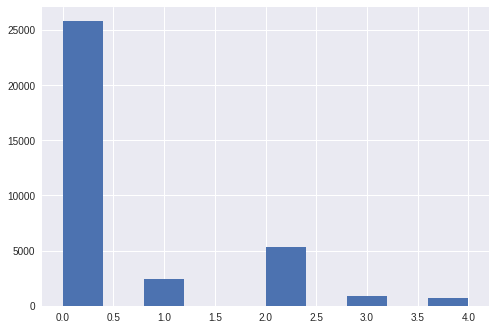

In [11]:
trainLabels = pd.read_csv("trainLabels.csv")
trainLabels.head()
trainLabels["level"].hist()
trainLabels["level"].unique()
listing = os.listdir("train") 
len(listing)

In [0]:
listing_train=listing[:25000]
listing_val=listing[25000:]


In [0]:
!mkdir train/train
!mkdir train/val

In [0]:
%%capture
import os

dir_path = "./train/"
output_path = "./train/train/"

if not os.path.exists(output_path):
    os.mkdir(output_path)

for file_name in listing_train:
    if "jpeg" in file_name:
        os.rename(dir_path+file_name,output_path+file_name)


In [0]:
%%capture
import os

dir_path = "./train/"
output_path = "./train/val/"

if not os.path.exists(output_path):
    os.mkdir(output_path)

for file_name in listing_val:
    if "jpeg" in file_name:
        os.rename(dir_path+file_name,output_path+file_name)


In [9]:
!ls train/val -1 | wc -l
!ls train/train -1 | wc -l

10126
25000


In [0]:

import os
import math
from skimage import io
from skimage import exposure

def data_aug_train(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
        if "jpeg" in file_name:
            print(file_name)
            image = io.imread(path+file_name)
            #v_min, v_max = np.percentile(image, (0.2, 99.8))
            #better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
            log_correction_image = exposure.adjust_log(image)
            sigmoid_correction_image = exposure.adjust_sigmoid(image)
            #horizontal_flip = image[:, ::-1]
            #color_inversion_image_with_np = np.invert(image)
            #adjusted_gamma_image = exposure.adjust_gamma(image, gamma=0.4, gain=0.9)
            #io.imsave(path+str(1)+file_name,better_contrast)
            io.imsave(path+str(2)+file_name,log_correction_image)
            io.imsave(path+str(3)+file_name,sigmoid_correction_image)
            #io.imsave(path+str(4)+file_name,horizontal_flip)
            #io.imsave('./images/'+str(5)+file_name,adjusted_gamma_image)
            #io.imsave('./images/invert'+file_name,color_inversion_image_with_np)

        

In [0]:
%%capture
import os
import math
from skimage import io
from skimage import exposure

def data_aug_val(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
        if "jpeg" in file_name:
            print(file_name)
            image = io.imread(path+file_name)
            #v_min, v_max = np.percentile(image, (0.2, 99.8))
            #better_contrast = exposure.rescale_intensity(image, in_range=(v_min, v_max))
            #log_correction_image = exposure.adjust_log(image)
            #sigmoid_correction_image = exposure.adjust_sigmoid(image)
            horizontal_flip = image[:, ::-1]
            #color_inversion_image_with_np = np.invert(image)
            #adjusted_gamma_image = exposure.adjust_gamma(image, gamma=0.4, gain=0.9)
            #io.imsave(path+str(1)+file_name,better_contrast)
            io.imsave(path+str(2)+file_name,log_correction_image)
            io.imsave(path+str(3)+file_name,sigmoid_correction_image)
            #io.imsave(path+str(4)+file_name,horizontal_flip)
            #io.imsave('./images/'+str(5)+file_name,adjusted_gamma_image)
            #io.imsave('./images/invert'+file_name,color_inversion_image_with_np)

        

In [0]:
import os
import math
from skimage import io
from skimage import exposure

def invert(path):
    listing_test = os.listdir(path)
    for file_name in listing_test:
        if "jpeg" in file_name:
            image = io.imread(path+file_name)
            color_inversion_image_with_np = np.invert(image)
            #io.imsave('./images/'+str(5)+file_name,adjusted_gamma_image)
            io.imsave(path+file_name,color_inversion_image_with_np)


In [0]:
from PIL import Image
from skimage import exposure
import os, sys
import cv2

def resize(path):
    dirs = os.listdir( path )
    print(dirs)
    for file_name in dirs:
        if "jpeg" in file_name:
            #img = Image.open(path+file_name)
            img = cv2.imread(path+file_name)
            img = img[:, :, 1]
            f, e = os.path.splitext(path+file_name)
            print(f)
            #imResize = green.resize((299,299), Image.ANTIALIAS)
            #img = exposure.equalize_hist(imResize)
            #img.save(f +  '.jpg', quality=100)
            img  = cv2.resize(img, (512,512), interpolation = cv2.INTER_AREA)
            img=cv2.equalizeHist(img)
            cv2.imwrite(f +  '.jpeg',img)


In [0]:
!mkdir train/train/0
!mkdir train/train/1
!mkdir train/train/2
!mkdir train/train/3
!mkdir train/train/4
!mkdir train/val/0
!mkdir train/val/1
!mkdir train/val/2
!mkdir train/val/3
!mkdir train/val/4

In [0]:
listing_train = os.listdir("train/train")
listing_val = os.listdir("train/val")

In [23]:
file=listing_train[0]
base = os.path.basename("train/" + file)
print( os.path.splitext(file)[0])

7894_left


In [0]:
from PIL import Image

base_dir = "train/val/"

for file in listing_val:
  try:
    fileName = os.path.splitext(file)[0]
    folder_name = trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]  
    os.rename(base_dir + file, base_dir + str(folder_name) + "/" + file )
  except:
    pass
    


In [0]:
from PIL import Image

base_dir = "train/train/"

for file in listing_train:
  try:
    fileName = os.path.splitext(file)[0]
    folder_name = trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]  
    os.rename(base_dir + file, base_dir + str(folder_name) + "/" + file )
  except:
    pass
    


In [31]:
!ls train/val/0 -1 | wc -l
!ls train/train/0 -1 | wc -l

600
3019


In [32]:
!ls train/val/1 -1 | wc -l
!ls train/train/1 -1 | wc -l

400
2393


In [33]:
!ls train/val/2 -1 | wc -l
!ls train/train/2 -1 | wc -l

300
1797


In [34]:
!ls train/val/3 -1 | wc -l
!ls train/train/3 -1 | wc -l

262
1830


In [35]:
!ls train/val/4 -1 | wc -l
!ls train/train/4 -1 | wc -l

210
1493


In [0]:
def delete_from_dir(path,num):
  listing = os.listdir(path)
  for rem in listing[num:]:
    os.remove(path+rem)

In [0]:
delete_from_dir("train/train/0/",1000)
delete_from_dir("train/val/0/",600)
delete_from_dir("train/train/1/",800)
delete_from_dir("train/val/1/",400)
delete_from_dir("train/train/2/",600)
delete_from_dir("train/val/2/",300)

In [28]:
from multiprocessing import Pool

        
p = Pool(processes=6)        
        
arr = ["train/train/2/","train/train/1/","train/train/3/","train/train/4/","train/val/0/","train/val/1/","train/val/2/","train/val/3/","train/val/4/"]


result = p.map(resize,arr)



['30785_left.jpeg', '38392_right.jpeg', '13446_left.jpeg', '1906_right.jpeg', '43873_left.jpeg', '15274_right.jpeg', '20146_left.jpeg', '9384_right.jpeg', '31421_right.jpeg', '5058_right.jpeg', '40684_left.jpeg', '8883_right.jpeg', '8966_left.jpeg', '44029_right.jpeg', '7607_right.jpeg', '20249_left.jpeg', '18133_right.jpeg', '17679_left.jpeg', '25745_right.jpeg', '14834_right.jpeg', '8830_right.jpeg', '18017_right.jpeg', '25138_left.jpeg', '17075_right.jpeg', '3104_left.jpeg', '12299_left.jpeg', '8825_right.jpeg', '43042_left.jpeg', '22841_right.jpeg', '41845_right.jpeg', '761_left.jpeg', '7905_left.jpeg', '41353_right.jpeg', '25426_left.jpeg', '30832_right.jpeg', '37593_left.jpeg', '13638_right.jpeg', '20824_left.jpeg', '4676_left.jpeg', '4693_right.jpeg', '18486_right.jpeg', '39577_left.jpeg', '41180_left.jpeg', '5058_left.jpeg', '22016_left.jpeg', '6339_left.jpeg', '31255_left.jpeg', '11288_left.jpeg', '36145_left.jpeg', '36919_left.jpeg', '16061_left.jpeg', '30042_right.jpeg', '11

['25985_left.jpeg', '21444_left.jpeg', '32630_right.jpeg', '27081_left.jpeg', '17135_right.jpeg', '9863_left.jpeg', '22901_right.jpeg', '36258_left.jpeg', '18567_right.jpeg', '35704_right.jpeg', '37438_left.jpeg', '7164_right.jpeg', '32149_right.jpeg', '12419_left.jpeg', '31729_right.jpeg', '35112_right.jpeg', '17221_right.jpeg', '7853_left.jpeg', '5258_right.jpeg', '33283_left.jpeg', '14976_right.jpeg', '1430_left.jpeg', '17669_right.jpeg', '43050_left.jpeg', '30255_right.jpeg', '29839_right.jpeg', '34708_left.jpeg', '39505_left.jpeg', '21373_right.jpeg', '8292_left.jpeg', '37117_left.jpeg', '40183_right.jpeg', '22379_left.jpeg', '12995_left.jpeg', '22669_left.jpeg', '3064_right.jpeg', '9783_right.jpeg', '23326_right.jpeg', '34844_right.jpeg', '19663_left.jpeg', '8681_left.jpeg', '3563_right.jpeg', '6997_right.jpeg', '15870_right.jpeg', '294_right.jpeg', '15038_left.jpeg', '16114_right.jpeg', '27674_right.jpeg', '42022_right.jpeg', '33236_left.jpeg', '9680_left.jpeg', '35112_left.jpeg

train/train/3/32064_left
train/train/1/41717_right
train/val/1/13945_left
train/train/4/25985_left
train/train/2/30785_left
train/val/0/43810_left
train/train/3/13716_right
train/train/1/7961_right
train/val/1/43243_left
train/train/4/21444_left
train/val/0/2041_right
train/train/1/5435_right
train/train/2/38392_right
train/val/1/35215_left
train/train/3/25119_left
train/train/1/40390_right
train/val/1/2877_left
train/train/2/13446_left
train/val/0/36975_left
train/train/4/32630_right
train/train/1/38179_right
train/val/1/6290_right
train/train/3/12612_right
train/train/2/1906_right
train/train/1/393_right
train/val/0/43183_right
train/train/4/27081_left
train/val/1/38326_left
train/train/1/15528_right
train/train/3/5814_right
train/train/4/17135_right
train/train/2/43873_left
train/val/0/43448_right
train/train/1/7174_left
train/val/1/26300_left
train/train/4/9863_left
train/train/2/15274_right
train/train/3/43416_left
train/train/3/3379_right
train/train/2/20146_left
train/train/1/63

train/val/0/1638_right
train/val/1/6927_right
train/train/3/43223_right
train/train/1/28551_right
train/val/1/25203_left
train/train/4/35112_right
train/train/2/7607_right
train/val/0/23223_left
train/train/3/17972_left
train/train/1/4839_left
train/val/1/38715_left
train/train/4/17221_right
train/train/3/12881_right
train/val/0/24405_right
train/train/1/27677_left
train/train/2/20249_left
train/train/3/41714_left
train/train/4/7853_left
train/train/1/28113_left
train/train/2/18133_right
train/val/1/17699_right
train/val/0/43250_right
train/train/4/5258_right
train/train/3/28093_right
train/train/1/17998_left
train/train/2/17679_left
train/val/0/44337_right
train/train/2/25745_right
train/val/1/16280_left
train/train/2/14834_right
train/train/4/33283_left
train/train/3/25119_right
train/train/1/12903_right
train/val/1/29803_right
train/val/0/34232_right
train/train/1/31667_right
train/train/4/14976_right
train/train/2/8830_right
train/val/1/39982_left
train/train/3/2016_right
train/tra

train/train/1/14251_right
train/train/3/35052_right
train/val/0/2123_left
train/val/1/23395_right
train/train/2/7905_left
train/train/4/8292_left
train/train/1/43639_right
train/train/3/687_left
train/train/1/17732_right
train/val/1/34304_left
train/val/0/16310_right
train/train/4/37117_left
train/train/2/41353_right
train/val/1/36035_right
train/train/3/32339_left
train/val/0/4266_left
train/train/1/20677_right
train/train/4/40183_right
train/val/1/27426_right
train/train/2/25426_left
train/train/1/11959_left
train/train/3/34445_right
train/train/2/30832_right
train/val/0/18631_left
train/train/1/32695_left
train/val/1/43063_right
train/train/4/22379_left
train/train/1/15775_right
train/train/2/37593_left
train/train/3/23369_right
train/val/1/41324_left
train/train/2/13638_right
train/val/0/21751_right
train/train/1/9868_right
train/train/3/20939_left
train/val/1/25637_right
train/train/2/20824_left
train/train/4/12995_left
train/train/1/24166_right
train/val/0/14752_left
train/train/

train/train/1/9255_right
train/val/1/31363_left
train/train/2/22016_left
train/train/3/32064_right
train/train/4/294_right
train/train/1/34203_right
train/train/2/6339_left
train/val/0/26596_left
train/val/1/30235_left
train/train/3/15798_right
train/train/2/31255_left
train/train/1/18493_left
train/train/4/15038_left
train/val/0/42363_right
train/val/1/3459_left
train/train/3/6433_left
train/train/4/16114_right
train/train/2/11288_left
train/val/0/22729_left
train/train/4/27674_right
train/train/1/26741_left
train/train/2/36145_left
train/val/1/11547_right
train/train/3/42408_right
train/val/0/36223_left
train/train/4/42022_right
train/train/2/36919_left
train/train/1/6704_left
train/val/1/38066_right
train/val/0/15174_left
train/train/3/15795_right
train/train/4/33236_left
train/train/2/16061_left
train/train/1/3671_left
train/val/0/1742_right
train/train/4/9680_left
train/val/1/39978_left
train/train/3/1177_left
train/train/1/41059_right
train/train/2/30042_right
train/train/4/35112

train/val/0/29050_left
train/train/1/31722_left
train/val/1/25162_left
train/train/4/11874_right
train/val/0/621_right
train/val/1/38727_left
train/train/3/14224_right
train/train/2/20326_right
train/train/1/31724_left
train/train/4/24472_left
train/train/2/31413_left
train/train/4/37829_left
train/val/1/19743_left
train/train/3/23245_right
train/train/2/8640_left
train/train/1/31540_right
train/val/0/23955_left
train/train/3/7859_right
train/train/2/23605_left
train/val/1/42633_left
train/val/0/33813_left
train/train/1/39743_right
train/train/4/24853_right
train/val/1/17009_left
train/train/2/3562_left
train/val/0/26524_right
train/train/1/527_left
train/train/3/6736_right
train/train/2/32308_left
train/train/4/367_left
train/train/1/16576_left
train/train/4/1430_right
train/val/0/9661_left
train/val/1/15468_right
train/train/2/22760_left
train/train/3/43633_right
train/train/4/43141_left
train/train/1/9871_left
train/train/2/25751_right
train/train/4/33493_left
train/val/1/33395_left

train/train/1/25475_right
train/val/1/20370_left
train/val/0/12933_right
train/train/4/12108_right
train/train/1/32307_left
train/train/3/17481_right
train/val/1/6965_left
train/train/2/39459_left
train/val/0/27617_left
train/train/4/43339_left
train/val/1/43753_right
train/train/1/38164_left
train/train/2/2453_left
train/train/3/25120_right
train/val/1/39588_left
train/train/3/7026_right
train/train/4/4005_right
train/train/2/36507_left
train/val/0/10566_right
train/train/1/16197_left
train/train/4/41430_left
train/train/3/39322_right
train/val/1/32893_right
train/train/2/7971_right
train/train/4/31590_right
train/val/0/41161_right
train/train/1/9008_left
train/val/1/14825_left
train/train/3/13022_left
train/train/2/29615_right
train/train/4/40183_left
train/val/1/26591_right
train/val/0/6938_left
train/train/1/38071_left
train/val/0/16614_left
train/train/3/13889_right
train/train/2/24656_right
train/val/1/22841_left
train/train/1/19626_left
train/train/4/19604_left
train/train/3/278

train/val/0/25138_right
train/train/1/21571_right
train/val/1/7754_left
train/train/4/43339_right
train/train/2/27226_right
train/train/3/25303_right
train/val/1/22360_left
train/val/0/9626_right
train/train/1/5009_right
train/train/4/20144_left
train/train/2/7884_right
train/val/0/2229_right
train/val/1/40757_left
train/train/3/18363_right
train/train/4/9419_left
train/train/1/1036_right
train/train/2/33799_right
train/val/1/23873_left
train/val/0/25767_left
train/train/3/37875_left
train/val/1/14374_right
train/train/4/17940_left
train/train/1/525_right
train/train/2/25429_right
train/train/4/3802_left
train/val/0/437_left
train/val/1/14248_left
train/train/3/20167_right
train/train/2/4163_right
train/train/4/6707_right
train/train/1/13345_right
train/train/3/11529_right
train/train/2/43985_right
train/val/1/8410_left
train/val/0/26994_left
train/train/4/43199_left
train/train/3/42891_left
train/train/2/10250_right
train/train/1/2294_left
train/val/1/2877_right
train/train/3/32603_le

train/val/1/35748_left
train/train/1/4304_left
train/train/3/40069_right
train/val/0/31471_right
train/train/2/41624_right
train/train/4/40319_right
train/train/1/178_right
train/val/1/34648_left
train/train/2/6537_right
train/val/0/2517_right
train/train/3/17992_right
train/val/1/9509_left
train/train/2/42542_right
train/train/4/19061_right
train/val/0/15383_right
train/train/1/39396_left
train/train/3/6537_left
train/val/1/16289_left
train/train/2/14078_left
train/val/0/7328_left
train/train/4/16_left
train/train/1/24783_left
train/val/1/20030_right
train/train/3/531_right
train/val/1/42636_left
train/train/1/2972_right
train/val/0/9487_right
train/train/3/43008_right
train/train/2/16629_right
train/train/4/11874_left
train/val/1/22332_left
train/train/3/5185_right
train/train/1/39554_left
train/train/4/44249_right
train/train/3/20402_right
train/val/0/32255_right
train/train/2/28661_left
train/train/4/18030_left
train/val/1/13494_right
train/train/1/37936_left
train/train/4/9518_rig

train/val/1/11819_right
train/train/3/11529_left
train/train/4/3371_right
train/val/0/1589_left
train/train/2/32822_right
train/train/3/37034_right
train/train/1/10758_left
train/val/1/13994_left
train/train/4/28386_left
train/val/0/25084_left
train/val/1/13595_left
train/train/3/23787_left
train/train/2/5237_right
train/train/1/23029_right
train/train/4/30303_right
train/train/2/31327_right
train/val/0/43935_right
train/train/3/21580_right
train/val/1/31469_right
train/train/1/3094_left
train/val/0/42187_left
train/train/4/15376_left
train/train/2/2107_left
train/train/3/40048_left
train/val/0/7032_left
train/val/1/22625_right
train/train/1/7172_right
train/train/4/4086_left
train/train/2/41374_right
train/val/1/27588_right
train/val/0/38419_left
train/train/1/18708_right
train/train/3/16633_left
train/val/0/8620_right
train/val/1/7459_left
train/train/4/16_right
train/train/2/11965_left
train/train/1/18528_right
train/val/0/15051_left
train/train/3/7959_right
train/val/1/13043_left
t

train/train/3/1002_left
train/train/4/35861_right
train/val/1/44069_left
train/train/2/7971_left
train/val/0/36654_left
train/train/3/18025_left
train/train/4/36640_right
train/train/1/32644_left
train/val/0/14833_left
train/val/1/40684_right
train/train/4/17135_left
train/train/2/27452_left
train/train/3/32507_left
train/val/1/16941_left
train/train/1/8006_left
train/train/4/43839_right
train/val/0/19344_right
train/train/2/20164_right
train/val/1/34611_right
train/train/3/39521_right
train/train/2/18382_right
train/val/0/3650_right
train/train/1/17629_left
train/train/4/18567_left
train/val/1/32627_right
train/train/4/39188_left
train/train/3/1639_left
train/train/2/15509_left
train/val/1/11500_right
train/val/0/11942_right
train/train/3/13270_left
train/train/1/8347_left
train/train/4/12014_right
train/val/1/34718_left
train/train/2/11651_left
train/train/3/29604_right
train/train/1/20499_left
train/val/1/31348_left
train/val/0/446_left
train/train/3/15954_right
train/train/4/4688_r

train/val/1/13522_left
train/train/3/37426_right
train/val/0/30413_left
train/train/1/16857_right
train/train/2/25558_right
train/val/1/39409_right
train/train/4/3064_left
train/train/3/18901_right
train/train/1/27057_left
train/val/0/7560_right
train/train/2/25401_left
train/train/3/17843_right
train/val/1/6546_right
train/val/0/6638_right
train/train/1/7219_left
train/train/4/28976_right
train/train/1/7379_right
train/val/1/5044_left
train/train/4/4374_left
train/train/3/8678_right
train/train/2/3265_left
train/val/0/12027_right
train/val/1/28721_right
train/train/1/31347_right
train/train/4/13222_left
train/val/0/34446_right
train/train/3/15870_left
train/val/0/8753_right
train/train/2/9934_right
train/train/4/7821_right
train/train/1/2488_right
train/train/3/1099_left
train/val/1/15306_right
train/train/4/39747_right
train/val/0/13678_right
train/train/2/44148_left
train/val/1/33434_right
train/train/3/7026_left
train/train/1/9008_right
train/val/1/36285_left
train/val/0/19960_righ

train/train/3/5789_left
train/train/2/27581_left
train/val/0/912_left
train/val/1/24995_right
train/train/1/24237_right
train/train/4/19663_right
train/train/3/14129_right
train/train/2/38882_right
train/train/1/40558_right
train/val/0/30897_right
train/val/1/11818_right
train/train/4/2804_left
train/train/3/2862_left
train/train/1/9166_right
train/val/1/9759_left
train/train/4/12861_right
train/train/2/19056_right
train/val/0/30885_left
train/train/1/36256_right
train/train/4/6707_left
train/val/1/4830_left
train/train/3/8565_right
train/train/1/39018_left
train/train/4/36074_left
train/train/2/33447_left
train/train/3/23244_right
train/train/1/7378_right
train/val/1/39504_right
train/val/0/13854_left
train/train/4/23422_left
train/train/2/23120_right
train/train/3/10153_right
train/train/1/5953_right
train/val/1/25260_right
train/train/2/34822_right
train/train/4/9156_right
train/val/1/34718_right
train/train/1/3605_left
train/val/0/2113_right
train/train/3/35422_right
train/train/2/

train/train/1/13126_left
train/train/4/28257_right
train/val/0/33049_left
train/train/3/35710_right
train/train/1/21297_right
train/val/1/14936_right
train/train/2/15639_right
train/train/4/37708_left
train/val/1/5497_left
train/val/0/15045_left
train/train/2/20742_right
train/train/3/17899_left
train/val/1/6631_left
train/train/1/28015_left
train/train/4/4909_left
train/train/2/27722_right
train/val/1/1309_left
train/val/0/18734_left
train/val/1/20309_left
train/train/1/15487_left
train/train/2/39943_right
train/train/3/23884_right
train/train/4/28549_right
train/val/1/5008_left
train/train/1/42653_right
train/val/0/29235_right
train/train/1/41845_left
train/train/2/12650_right
train/train/3/26299_right
train/train/1/43457_left
train/train/4/11896_left
train/val/1/43291_right
train/train/3/44200_right
train/val/0/26413_right
train/train/2/30909_right
train/train/4/28435_right
train/train/1/5062_left
train/val/1/17688_left
train/train/3/42753_right
train/train/1/32008_left
train/train/

train/train/4/2338_right
train/train/1/34567_left
train/train/2/30030_right
train/val/0/1096_left
train/train/4/42484_left
train/val/1/13770_left
train/train/3/22502_left
train/train/1/20346_left
train/train/2/419_left
train/val/1/1592_left
train/val/0/36733_left
train/train/1/29322_left
train/train/4/24019_left
train/train/3/6321_left
train/val/1/32253_right
train/val/0/16366_left
train/train/2/10319_left
train/train/1/35807_right
train/train/4/936_right
train/val/0/13736_right
train/train/3/9951_left
train/val/1/1520_left
train/train/2/12912_right
train/val/0/11520_right
train/train/1/38882_left
train/train/3/24232_left
train/val/1/17785_left
train/train/4/39741_right
train/val/0/22456_right
train/train/3/18025_right
train/train/1/24155_right
train/train/2/38447_left
train/val/1/41548_right
train/train/1/30741_right
train/train/3/30015_left
train/train/2/22712_right
train/val/1/1932_right
train/train/4/19347_right
train/val/0/7464_left
train/train/1/1369_right
train/train/3/35873_rig

train/train/2/27961_left
train/train/4/5105_left
train/train/1/31363_right
train/val/0/25568_right
train/val/1/24996_right
train/train/3/15257_left
train/train/4/13395_right
train/train/2/30414_right
train/train/1/34761_right
train/train/3/38662_right
train/train/1/28579_left
train/val/1/3339_left
train/train/4/21511_right
train/val/0/19946_left
train/train/2/40260_left
train/val/1/11505_left
train/train/3/21835_left
train/val/0/42555_right
train/train/4/20458_right
train/train/2/36267_right
train/train/1/24645_left
train/val/1/22398_right
train/train/3/19586_right
train/val/0/15125_right
train/train/1/10233_left
train/train/2/42281_left
train/train/3/40223_right
train/val/1/28839_right
train/train/4/35130_right
train/val/0/29970_left
train/train/1/11421_right
train/train/2/17757_right
train/train/3/14297_left
train/val/0/40624_left
train/val/1/41538_left
train/train/2/5947_right
train/train/4/25985_right
train/train/1/12452_left
train/train/3/17481_left
train/train/2/26985_right
train

train/val/1/24983_left
train/train/1/7886_right
train/val/0/12678_left
train/train/1/214_left
train/train/2/14490_left
train/train/4/36722_right
train/val/1/41863_right
train/train/3/5964_left
train/val/0/2687_right
train/val/1/30033_left
train/train/1/14456_right
train/train/4/20144_right
train/train/3/31735_right
train/train/2/7862_left
train/val/0/24991_left
train/val/1/31833_right
train/train/4/25181_left
train/val/0/3022_left
train/train/1/12547_left
train/train/3/27506_right
train/val/0/23073_right
train/train/2/5186_right
train/train/1/26024_left
train/train/4/27094_left
train/train/3/932_right
train/val/1/7322_left
train/val/0/32014_right
train/train/4/32868_right
train/train/1/42560_left
train/val/1/26477_left
train/train/3/41566_right
train/train/2/3074_left
train/val/0/34408_left
train/train/1/16458_right
train/val/1/1689_right
train/train/4/43997_left
train/train/3/19522_right
train/train/2/14205_right
train/val/0/19575_left
train/train/2/19635_left
train/train/3/16600_left

train/val/0/28571_left
train/val/1/5891_left
train/train/2/11288_right
train/val/0/9126_right
train/train/3/32726_right
train/val/1/15095_right
train/train/1/35967_left
train/train/4/8087_right
train/train/2/26332_left
train/train/1/11113_right
train/train/4/22520_left
train/val/1/13945_right
train/train/3/6433_right
train/val/0/39364_left
train/train/1/7411_right
train/train/2/7371_right
train/val/1/19177_right
train/train/4/36125_left
train/train/3/29018_right
train/train/1/12018_right
train/val/0/24757_left
train/val/1/23394_left
train/train/4/25697_right
train/train/2/8706_right
train/train/3/8699_right
train/val/0/7629_left
train/train/3/17631_left
train/train/1/27223_right
train/val/1/5776_right
train/train/4/3611_right
train/val/0/19728_left
train/train/3/16718_right
train/train/2/6484_left
train/train/1/26810_left
train/val/1/20115_left
train/train/2/5361_left
train/train/4/33725_right
train/train/1/42020_left
train/train/3/37004_right
train/val/0/2530_left
train/val/1/34992_le

train/val/1/19976_left
train/val/0/30163_left
train/train/3/35873_left
train/train/1/7464_right
train/train/4/38513_right
train/train/3/11292_right
train/train/2/32936_left
train/train/4/9518_left
train/val/0/21573_left
train/train/3/43831_right
train/val/1/7746_left
train/train/1/37788_right
train/val/0/21173_right
train/train/4/1663_right
train/train/2/20842_left
train/train/3/24317_right
train/train/2/38502_left
train/val/0/33145_right
train/train/1/6691_left
train/val/1/27378_left
train/train/4/39505_right
train/train/3/37354_right
train/train/2/3163_left
train/val/1/30415_right
train/val/0/15026_right
train/train/1/23306_right
train/train/4/367_right
train/train/2/36074_right
train/train/3/4620_right
train/train/1/30550_left
train/val/1/33889_left
train/train/2/26905_right
train/train/3/9526_right
train/val/0/34287_left
train/train/4/14844_left
train/train/1/44328_right
train/val/0/23903_right
train/train/2/43153_right
train/val/1/31060_left
train/train/3/23604_right
train/train/1

train/val/0/24202_left
train/train/3/38573_right
train/val/1/33507_right
train/train/2/41800_right
train/val/0/4002_right
train/train/4/31659_left
train/train/1/25518_left
train/val/1/28442_right
train/train/3/18450_left
train/train/1/19114_right
train/train/2/15918_left
train/val/0/33463_left
train/train/4/9311_left
train/train/1/26235_left
train/train/3/8284_left
train/val/1/30081_right
train/val/0/41889_left
train/train/2/26483_left
train/val/1/30653_right
train/train/4/13669_right
train/train/3/35850_left
train/train/1/41525_right
train/train/4/14340_left
train/val/0/2646_right
train/val/1/22821_right
train/train/2/3275_left
train/train/3/31647_left
train/train/1/24703_right
train/train/4/15590_left
train/val/0/43227_right
train/val/1/16628_left
train/train/4/30747_right
train/train/2/7038_right
train/val/1/40848_right
train/train/3/4282_left
train/train/1/27065_left
train/val/0/10752_right
train/train/4/10785_left
train/val/1/42082_left
train/train/2/23694_left
train/train/1/33208

train/val/0/1272_right
train/train/3/23318_right
train/train/2/10726_left
train/train/1/27191_right
train/val/1/36442_right
train/train/4/33003_left
train/train/3/40052_left
train/val/1/14664_left
train/train/1/35215_right
train/val/0/18576_left
train/train/2/10312_right
train/train/4/13811_left
train/val/1/11007_left
train/train/2/40616_left
train/train/3/25723_left
train/val/0/33674_left
train/train/1/43311_right
train/train/4/33358_right
train/train/2/18999_right
train/val/1/30550_right
train/train/3/3422_left
train/train/4/44247_right
train/train/1/17509_left
train/val/0/43113_left
train/val/1/31163_left
train/train/2/7298_left
train/val/0/21948_left
train/train/1/4527_left
train/train/4/13651_right
train/train/3/34666_left
train/val/1/2233_left
train/train/2/41353_left
train/val/0/18092_right
train/val/1/4470_left
train/train/1/16835_right
train/train/3/16412_right
train/train/4/21205_left
train/train/2/9961_left
train/val/0/39293_left
train/val/1/1277_left
train/train/3/10047_lef

train/train/2/2992_left
train/val/0/5533_right
train/train/3/38694_right
train/val/1/2382_left
train/train/1/38008_left
train/train/2/4082_right
train/train/4/22160_right
train/val/0/21869_right
train/train/3/609_left
train/val/1/28726_left
train/train/1/20169_right
train/val/1/44117_right
train/train/2/13029_left
train/train/4/22271_left
train/train/3/2862_right
train/val/0/3082_left
train/train/1/36237_right
train/train/4/41174_left
train/train/2/41252_left
train/val/1/20361_right
train/train/3/32062_right
train/train/2/34288_left
train/train/1/9478_left
train/val/1/2972_left
train/train/4/18819_left
train/val/0/29858_right
train/val/1/14336_left
train/train/1/9467_right
train/train/4/43141_right
train/train/3/3444_right
train/train/1/31054_left
train/train/2/28227_right
train/val/1/11446_left
train/val/0/34819_left
train/train/4/25407_left
train/train/1/43694_left
train/val/1/34757_left
train/train/2/20809_right
train/train/3/30922_right
train/train/1/21331_left
train/val/1/1570_lef

train/val/0/42213_right
train/val/0/7283_right
train/train/1/20460_right
train/val/1/34734_right
train/train/2/30676_left
train/train/4/41201_left
train/train/3/20351_left
train/train/1/23771_right
train/val/0/31424_right
train/val/1/12496_right
train/train/2/12835_left
train/train/3/2132_right
train/train/4/11492_left
train/val/1/15708_left
train/val/0/6133_right
train/train/1/40423_left
train/train/2/11270_right
train/train/3/13684_right
train/val/0/27110_right
train/train/1/14961_left
train/val/0/6118_left
train/train/4/19285_right
train/val/1/17805_left
train/train/3/3343_right
train/train/2/37984_right
train/val/0/25560_right
train/train/1/8162_left
train/val/1/30197_right
train/train/2/17548_right
train/train/4/31006_right
train/train/3/18416_right
train/val/0/23009_left
train/train/2/30408_left
train/val/1/24990_right
train/train/3/11219_right
train/train/4/7992_left
train/train/1/4479_left
train/train/2/19004_left
train/val/0/39679_left
train/train/4/20111_left
train/train/1/21

train/val/0/17802_right
train/train/1/8418_right
train/train/2/192_left
train/train/4/7945_left
train/val/1/30099_left
train/val/0/39867_right
train/train/3/22930_right
train/train/2/42953_right
train/val/1/39834_right
train/train/4/37958_left
train/train/1/2129_right
train/val/1/20913_left
train/train/3/14029_right
train/val/0/34536_left
train/train/1/2956_right
train/train/2/20878_right
train/train/4/217_left
train/val/1/25448_left
train/train/3/31497_left
train/train/4/35704_left
train/train/1/35579_left
train/val/0/6668_right
train/train/2/37984_left
train/val/1/25008_right
train/train/1/26140_right
train/train/3/20111_right
train/train/4/16413_left
train/train/2/5676_right
train/val/1/43318_right
train/val/0/37072_left
train/train/1/997_right
train/train/4/10653_left
train/val/1/36513_right
train/train/2/36660_right
train/train/3/5964_right
train/val/0/23578_right
train/train/1/2034_right
train/train/4/24772_left
train/train/2/19099_right
train/val/0/6030_right
train/train/1/15288

train/train/2/4399_right
train/train/4/9298_right
train/val/1/32768_right
train/train/1/7475_right
train/train/3/21760_left
train/train/2/33010_left
train/val/0/37522_right
train/train/4/34400_right
train/train/1/3339_right
train/val/1/114_left
train/train/3/31712_right
train/train/2/7082_right
train/val/0/15339_right
train/train/1/766_right
train/train/4/13022_right
train/train/3/36729_left
train/val/1/43063_left
train/val/0/35316_right
train/train/2/41796_left
train/val/1/38714_left
train/train/4/3993_left
train/train/3/30349_right
train/train/1/12577_right
train/val/0/32268_left
train/val/1/34706_left
train/train/3/33551_left
train/train/2/29760_left
train/train/1/26319_right
train/train/4/9598_right
train/val/0/6550_left
train/val/1/26649_left
train/train/4/11032_left
train/train/1/15935_left
train/train/3/42265_right
train/train/2/23961_right
train/val/0/39483_right
train/train/1/34567_right
train/train/3/32221_right
train/val/0/35989_left
train/train/4/15941_left
train/val/1/2803

train/val/1/41804_left
train/train/3/25533_right
train/train/1/42368_right
train/train/2/12775_right
train/train/3/36989_left
train/train/4/16007_right
train/val/1/5944_right
train/val/0/38792_right
train/train/1/37868_left
train/train/3/38907_right
train/val/1/9359_right
train/val/0/35650_right
train/train/4/15975_left
train/train/1/7219_right
train/train/2/21852_right
train/train/3/40922_left
train/train/1/34364_right
train/train/4/14849_right
train/val/1/17840_right
train/train/2/40937_left
train/val/0/4523_left
train/train/3/20760_left
train/train/4/20855_right
train/val/0/36148_left
train/train/1/36785_right
train/val/0/34119_right
train/val/1/42364_right
train/train/4/5258_left
train/train/3/14481_left
train/train/2/7774_left
train/val/0/30952_right
train/train/1/40423_right
train/val/1/2423_right
train/train/4/11854_right
train/val/0/21152_left
train/train/3/16025_right
train/train/2/18452_right
train/train/1/17550_right
train/val/0/41947_right
train/train/4/40323_right
train/tr

train/train/1/23718_right
train/val/0/43995_right
train/val/1/29737_left
train/train/2/12743_left
train/train/1/24237_left
train/train/4/35955_right
train/train/3/34863_right
train/train/3/11590_right
train/val/1/2129_left
train/val/0/35541_right
train/train/2/43543_left
train/train/1/28154_right
train/train/4/18370_left
train/train/3/31461_left
train/val/1/17785_right
train/val/0/21921_left
train/train/3/30930_right
train/val/0/7142_right
train/train/2/30269_left
train/train/1/31950_right
train/val/1/6175_right
train/val/0/8222_right
train/train/4/16309_right
train/train/1/29650_right
train/train/3/41953_right
train/val/1/4864_left
train/train/3/33685_right
train/train/1/40790_left
train/train/4/38518_right
train/train/2/17669_left
train/val/0/4299_left
train/train/2/35066_right
train/train/4/29960_left
train/val/1/6305_right
train/train/3/27939_right
train/train/2/24743_right
train/train/1/417_left
train/val/0/27664_right
train/val/1/9601_right
train/val/0/1832_left
train/train/4/365

train/train/2/12563_right
train/val/1/26665_left
train/val/0/33293_left
train/train/3/352_left
train/train/2/35855_right
train/val/1/22713_right
train/train/1/18575_right
train/train/4/40917_left
train/val/0/42901_right
train/train/3/44165_right
train/val/1/20286_left
train/val/0/34050_right
train/train/1/37020_right
train/train/2/5039_left
train/train/4/42484_right
train/val/0/18929_left
train/val/1/26312_right
train/val/0/21247_right
train/train/3/43836_left
train/val/1/39224_right
train/train/1/25717_right
train/train/3/5298_right
train/train/4/8292_right
train/val/0/23508_right
train/val/1/4831_left
train/train/2/32971_right
train/val/0/29985_right
train/train/3/22778_right
train/train/4/35461_right
train/train/1/30448_right
train/val/1/11818_left
train/train/2/8527_left
train/val/0/9573_right
train/train/1/6785_right
train/train/2/6276_right
train/train/3/41451_left
train/val/0/21021_left
train/train/4/11032_right
train/val/1/26103_right
train/val/0/20219_right
train/train/4/35766

train/val/2/42617_right
train/train/4/15459_right
train/val/0/42388_left
train/train/1/43826_left
train/train/3/4970_right
train/train/2/19421_right
train/train/4/38518_left
train/val/2/1178_left
train/train/1/29102_left
train/train/4/4130_left
train/val/0/18404_left
train/train/2/41528_right
train/val/2/29352_left
train/train/3/21825_left
train/train/1/40752_right
train/train/4/19471_left
train/train/3/38039_left
train/train/2/7829_left
train/val/2/16963_left
train/train/4/25972_right
train/val/0/11741_right
train/train/3/23803_left
train/val/2/31099_left
train/train/2/10306_right
train/train/1/24033_right
train/train/4/23831_right
train/train/4/25378_right
train/val/0/29678_left
train/val/2/37109_right
train/train/3/1471_right
train/train/1/8889_right
train/train/2/2011_left
train/val/0/31174_left
train/train/4/37783_right
train/val/0/31072_right
train/val/2/23132_right
train/train/3/19367_right
train/train/2/928_right
train/train/1/39978_right
train/val/0/34941_left
train/train/4/93

train/val/0/4899_left
train/train/2/27961_right
train/val/2/41806_right
train/train/4/27395_right
train/val/0/7646_right
train/train/2/2756_right
train/train/3/16633_right
train/train/1/5506_left
train/train/2/82_left
train/val/2/13605_left
train/train/3/11219_left
train/val/0/258_left
train/train/3/3570_right
train/train/4/16309_left
train/train/2/11089_right
train/val/0/44280_right
train/val/2/8610_right
train/train/1/38391_right
train/train/3/26553_right
train/val/0/30966_left
train/train/1/20570_left
train/train/3/16374_left
train/train/4/4496_left
train/val/2/29516_left
train/train/2/29760_right
train/train/1/16917_right
train/val/2/5024_left
train/val/0/27519_right
train/train/3/35789_right
train/train/4/38186_right
train/train/2/14915_left
train/train/1/13209_right
train/train/2/5740_left
train/val/2/6200_left
train/val/0/30682_left
train/train/4/24773_right
train/train/3/10159_right
train/train/1/22887_right
train/train/2/3932_left
train/val/2/5927_right
train/train/4/11807_lef

train/train/4/40673_right
train/val/0/20547_right
train/train/3/22769_left
train/train/1/12372_left
train/train/2/239_right
train/val/2/3655_left
train/val/0/12461_right
train/train/4/18803_right
train/train/1/19309_left
train/train/3/37426_left
train/train/2/31561_right
train/val/2/36461_left
train/train/1/41688_left
train/val/0/12868_left
train/train/2/3533_right
train/train/4/18902_right
train/train/2/19467_left
train/train/3/15795_left
train/val/2/31226_left
train/train/4/17453_right
train/val/0/28340_right
train/train/2/32668_left
train/train/1/1027_left
train/val/2/25763_left
train/train/4/22669_right
train/val/0/27107_right
train/train/3/28901_right
train/train/2/18515_right
train/train/1/22987_right
train/val/0/37631_right
train/train/4/9157_right
train/val/2/38439_right
train/train/1/24478_right
train/val/0/13409_left
train/val/2/32145_right
train/train/3/18971_left
train/train/4/31602_left
train/train/2/13201_right
train/train/1/21172_right
train/val/2/1290_left
train/train/4

train/train/2/24074_right
train/train/1/12397_right
train/val/2/25083_right
train/train/3/5505_left
train/val/0/30692_left
train/train/1/5861_right
train/train/2/9952_left
train/train/4/31984_left
train/val/2/15515_right
train/train/1/16941_right
train/val/2/34621_right
train/train/3/15923_right
train/train/2/34999_right
train/train/1/24754_left
train/val/0/17846_right
train/train/4/9157_left
train/train/1/11443_left
train/val/2/41415_right
train/train/2/14205_left
train/val/2/41675_left
train/val/0/7393_right
train/train/4/22901_left
train/train/3/458_left
train/train/1/34304_right
train/train/2/7446_left
train/val/2/23023_left
train/val/0/38373_left
train/train/3/11889_right
train/train/4/28929_right
train/train/1/40284_right
train/train/2/24611_right
train/val/2/11496_left
train/train/3/16936_left
train/val/0/18663_right
train/train/1/29377_left
train/train/4/1084_right
train/val/2/13892_right
train/train/3/12490_right
train/train/2/25458_right
train/val/0/9595_right
train/val/2/418

train/train/3/16651_right
train/train/2/23817_left
train/val/0/26688_left
train/val/2/40498_right
train/val/0/40525_right
train/train/1/32798_right
train/train/4/8462_right
train/train/3/19522_left
train/train/1/13031_left
train/train/2/37667_right
train/val/2/20189_left
train/val/0/9499_left
train/train/1/27713_left
train/train/3/22502_right
train/val/0/37010_left
train/train/1/5137_left
train/train/4/34453_left
train/val/2/21654_right
train/train/3/2577_left
train/train/2/13966_right
train/val/0/13878_left
train/train/2/18968_right
train/train/1/42766_right
train/val/2/29652_right
train/train/4/406_right
train/train/3/29604_left
train/train/1/40557_right
train/val/0/8500_left
train/val/2/10854_left
train/train/4/6017_left
train/train/1/41851_left
train/train/2/29972_left
train/train/3/23249_left
train/val/2/28000_right
train/val/0/34875_right
train/train/2/8675_right
train/train/4/19347_left
train/train/1/5365_left
train/train/3/17749_right
train/val/2/5668_right
train/val/0/37590_ri

train/val/0/14181_left
train/train/4/405_left
train/val/2/17658_right
train/train/3/12279_left
train/train/1/35054_left
train/val/0/4972_right
train/train/4/41445_left
train/val/2/11085_right
train/train/2/27143_right
train/train/3/1008_right
train/train/4/8681_right
train/train/1/13708_right
train/val/2/38176_left
train/val/0/21904_right
train/train/3/29320_left
train/train/2/43119_left
train/train/1/14522_right
train/train/4/43998_left
train/train/2/30120_left
train/train/1/11425_right
train/val/0/23919_left
train/train/3/39575_left
train/val/2/16832_left
train/val/0/41895_left
train/train/1/41932_left
train/train/2/24168_right
train/train/4/670_right
train/val/2/27960_left
train/train/3/6687_left
train/train/2/40915_left
train/val/2/17252_right
train/val/0/16877_left
train/train/1/24774_left
train/train/4/23604_left
train/val/2/27991_right
train/train/3/18046_left
train/train/4/35412_left
train/train/2/4965_right
train/train/1/11263_right
train/val/0/51_right
train/val/2/26841_right

train/val/2/33661_left
train/train/3/35850_right
train/train/4/326_left
train/train/2/16445_right
train/train/3/21746_right
train/train/1/25582_left
train/val/0/21219_right
train/val/2/2272_left
train/train/1/44236_left
train/train/2/11962_right
train/train/3/23648_left
train/train/4/13387_left
train/val/0/33291_right
train/val/2/35855_left
train/train/3/41031_right
train/val/0/25496_right
train/train/4/40819_right
train/train/1/15037_left
train/train/2/11040_right
train/train/4/31659_right
train/val/2/36767_left
train/val/0/32273_right
train/train/3/7531_left
train/train/1/14936_left
train/train/2/18255_left
train/train/4/34453_right
train/val/2/4697_left
train/train/1/42728_right
train/val/0/702_left
train/train/3/3096_left
train/val/0/17158_right
train/train/2/8155_left
train/train/4/25916_left
train/val/2/39036_left
train/train/1/38634_left
train/val/0/28379_left
train/train/3/23695_right
train/train/4/19485_right
train/val/2/32952_left
train/train/2/38768_right
train/train/1/6459_

train/train/1/14403_right
train/val/0/26442_right
train/train/3/31426_right
train/train/4/37813_left
train/train/2/22895_left
train/val/2/19815_right
train/train/2/24867_left
train/train/1/34302_right
train/val/0/7094_left
train/val/2/18296_left
train/train/4/13664_left
train/train/3/25872_right
train/train/2/9800_left
train/train/3/33685_left
train/val/2/22469_left
train/train/2/35175_right
train/val/0/22970_right
train/train/1/16249_right
train/train/4/24163_left
train/train/2/30274_right
train/train/3/21251_left
train/val/0/22814_right
train/val/2/20353_right
train/train/1/29569_left
train/train/2/42416_left
train/train/3/40296_left
train/val/2/33943_left
train/train/4/33906_left
train/val/0/13564_left
train/train/1/22045_right
train/val/0/33379_left
train/train/3/24346_left
train/val/2/19272_left
train/train/2/39869_right
train/train/1/3622_left
train/train/4/31043_left
train/train/3/33432_left
train/val/0/28112_right
train/train/3/36989_right
train/train/4/42358_left
train/val/2/2

train/val/0/20569_left
train/train/2/23798_right
train/val/0/1206_right
train/train/1/32798_left
train/train/3/38345_right
train/val/3/11142_right
train/train/2/6088_left
train/train/1/18972_right
train/val/2/35229_left
train/train/3/24232_right
train/train/2/39778_left
train/val/0/28556_left
train/val/3/9450_right
train/train/1/38083_left
train/val/2/36705_left
train/val/2/38247_left
train/train/3/30922_left
train/val/0/23850_left
train/train/2/5877_right
train/train/1/26595_right
train/val/2/21383_right
train/val/3/13489_left
train/train/3/28405_right
train/train/2/1500_left
train/val/0/32422_right
train/train/1/17847_left
train/val/2/19099_left
train/train/3/16651_left
train/train/2/12005_left
train/val/3/40366_left
train/val/0/24298_right
train/val/2/2205_right
train/train/1/19493_left
train/train/3/35699_left
train/val/3/26997_right
train/train/3/19414_left
train/val/2/23761_right
train/train/2/19993_right
train/train/1/30318_left
train/val/0/43289_right
train/val/3/41903_right
tr

train/train/3/22978_right
train/val/2/31085_left
train/val/0/30702_left
train/train/1/27885_right
train/train/2/35962_right
train/train/3/21846_left
train/val/2/21447_right
train/val/3/1177_right
train/val/0/25535_left
train/train/1/25758_right
train/train/2/9633_right
train/train/3/4155_left
train/train/1/5441_left
train/val/2/17309_left
train/val/0/28607_left
train/val/3/25593_left
train/train/3/23249_right
train/train/2/317_right
train/val/2/23775_left
train/train/1/607_right
train/val/3/35842_left
train/val/0/22368_right
train/val/2/22173_right
train/train/3/35789_left
train/train/1/35322_right
train/val/3/12000_left
train/train/2/21558_left
train/val/0/9957_right
train/train/2/12329_right
train/val/2/36983_left
train/train/1/2949_right
train/val/0/22257_right
train/train/3/29018_left
train/val/3/14482_right
train/train/2/1920_left
train/val/0/12624_left
train/val/2/24913_right
train/train/2/1893_left
train/train/3/18573_right
train/val/3/42172_left
train/train/1/14721_right
train/

train/val/0/36587_left
train/train/2/14892_left
train/val/2/27625_left
train/train/3/11142_left
train/val/0/23851_left
train/train/1/14650_left
train/val/3/35966_left
train/train/2/15154_left
train/train/3/9001_right
train/train/2/28355_left
train/val/0/7559_right
train/val/2/38127_left
train/train/1/3197_left
train/val/2/34084_right
train/train/2/20996_right
train/val/3/11147_right
train/train/1/40667_left
train/train/3/36722_left
train/val/2/28790_right
train/val/3/17972_right
train/val/0/17903_left
train/train/2/24127_left
train/train/1/28177_left
train/train/3/25533_left
train/val/2/17491_left
train/val/0/634_left
train/train/2/38800_left
train/val/3/19380_right
train/val/0/18601_left
train/val/2/37591_right
train/train/1/17326_left
train/train/3/18046_right
train/train/2/13566_left
train/val/0/13997_left
train/val/3/16025_left
train/val/2/18465_left
train/train/3/28053_right
train/train/1/16963_right
train/train/2/12929_right
train/train/1/13662_right
train/val/3/7520_left
train/t

train/val/0/597_left
train/val/2/1233_right
train/train/1/17647_right
train/val/3/39455_right
train/train/2/41957_right
train/val/3/34571_left
train/train/3/31962_left
train/train/1/36351_right
train/train/2/32320_left
train/val/0/24062_left
train/val/2/37609_left
train/train/1/14212_right
train/train/2/40321_right
train/train/3/16011_right
train/val/2/37773_left
train/val/3/3868_right
train/train/2/947_left
train/val/0/25815_right
train/train/1/6704_right
train/val/3/163_left
train/val/2/19047_left
train/val/0/19046_right
train/train/3/21796_left
train/train/1/11547_left
train/train/2/19377_right
train/val/2/13597_left
train/val/3/12652_right
train/train/3/15690_left
train/val/0/15932_right
train/train/1/14248_right
train/train/2/26194_left
train/train/3/44200_left
train/val/0/3273_right
train/val/3/32507_right
train/val/2/3485_right
train/train/1/1100_right
train/train/2/35667_left
train/train/3/25318_left
train/train/1/4329_left
train/val/3/31967_right
train/train/2/27404_right
trai

train/val/0/33382_right
train/val/2/7862_right
train/train/3/35867_right
train/train/2/26459_left
train/val/0/3527_right
train/val/3/33840_right
train/val/2/38363_right
train/train/3/35710_left
train/train/1/14501_right
train/train/2/25198_left
train/val/3/9846_left
train/val/2/35931_left
train/train/1/4304_right
train/val/0/15480_right
train/train/3/35368_right
train/train/2/32062_left
train/val/2/37079_left
train/train/1/16386_left
train/val/0/14511_right
train/val/3/11206_right
train/train/2/41249_left
train/val/0/26281_right
train/train/1/40212_left
train/train/3/21444_right
train/val/3/14129_left
train/val/2/23342_left
train/train/2/24075_left
train/val/0/27637_left
train/train/1/2161_left
train/train/2/17101_right
train/val/3/36190_right
train/train/3/23884_left
train/val/2/4903_right
train/train/1/11618_right
train/val/0/636_right
train/train/2/40201_left
train/val/3/40994_left
train/train/1/42503_right
train/train/3/18901_left
train/val/2/8418_left
train/val/3/28840_left
train/

train/val/2/31430_left
train/val/3/40731_right
train/val/4/11492_right
train/train/1/12872_right
train/train/3/22930_left
train/train/2/9930_right
train/val/3/15631_right
train/train/1/32918_right
train/train/3/19414_right
train/val/2/43273_right
train/val/4/13387_right
train/val/3/23803_right
train/train/3/19380_left
train/val/4/31924_left
train/train/2/39983_right
train/val/3/38247_right
train/train/1/1139_left
train/val/2/14325_left
train/val/4/28435_left
train/val/3/6321_right
train/train/1/40265_right
train/train/3/28093_left
train/val/2/9259_left
train/train/2/4214_right
train/val/4/14765_right
train/val/3/7859_left
train/train/1/40677_left
train/val/2/4409_right
train/train/1/10787_right
train/train/3/17992_left
train/train/2/14269_right
train/val/3/28405_left
train/val/4/33753_left
train/train/1/2488_left
train/val/2/33312_right
train/train/3/30396_right
train/train/3/43831_left
train/train/2/30779_right
train/val/3/6878_right
train/val/4/33621_left
train/val/2/35719_left
train

train/train/2/7222_right
train/val/2/36361_right
train/train/1/17705_right
train/val/4/12861_left
train/val/3/43105_left
train/train/3/28919_left
train/val/2/7437_left
train/val/4/13664_right
train/val/3/3379_left
train/train/2/13066_left
train/val/3/2577_right
train/train/1/27223_left
train/train/3/3343_left
train/val/4/36653_left
train/val/2/28291_right
train/val/3/7923_left
train/train/2/24163_right
train/val/4/5105_right
train/train/3/2901_right
train/val/2/1599_left
train/train/2/38743_right
train/train/1/7504_right
train/val/3/41342_right
train/val/2/9218_right
train/val/4/4252_right
train/train/1/7746_right
train/train/3/25650_right
train/train/2/27259_right
train/val/2/2966_right
train/val/3/4366_right
train/train/3/26888_right
train/val/4/24010_right
train/train/2/32970_right
train/val/2/29028_right
train/train/1/18618_right
train/train/3/11697_right
train/val/3/32388_left
train/val/2/26054_left
train/val/4/31746_left
train/train/1/3587_left
train/train/2/36933_left
train/val/

train/val/3/25650_left
train/train/1/10085_left
train/train/3/5823_right
train/val/4/405_right
train/val/2/3088_right
train/train/3/7520_right
train/train/1/14614_left
train/val/3/40405_left
train/val/2/36181_left
train/val/4/35461_left
train/train/1/8513_right
train/train/3/8749_right
train/val/3/32339_right
train/val/2/27100_left
train/train/1/36879_left
train/val/4/8743_right
train/train/3/12667_left
train/val/2/40915_right
train/val/4/31442_right
train/val/3/30594_right
train/train/1/14816_right
train/val/2/11724_right
train/train/3/35124_left
train/val/4/2916_left
train/val/3/32711_left
train/train/1/35812_right
train/val/2/43558_left
train/val/3/42408_left
train/train/1/9949_right
train/train/3/7329_right
train/val/4/6096_left
train/val/2/14748_right
train/train/1/8897_right
train/train/3/40441_right
train/train/1/30004_right
train/val/3/36166_left
train/val/4/18017_left
train/train/3/12208_right
train/val/2/27506_left
train/train/1/37469_right
train/val/4/28524_right
train/val/2

train/train/1/36745_left
train/val/4/31590_left
train/val/2/19197_right
train/val/4/36453_left
train/val/3/11858_left
train/train/1/41979_right
train/val/4/41761_left
train/val/2/7342_right
train/train/1/18433_left
train/val/3/27224_left
train/val/2/16882_left
train/val/4/19005_right
train/train/1/16268_right
train/val/3/32247_right
train/val/2/31816_right
train/val/4/17940_right
train/train/1/31010_right
train/val/4/39164_left
train/val/2/34701_left
train/train/1/3767_right
train/val/3/24140_right
train/val/4/16413_right
train/val/2/22227_left
train/train/1/29740_right
train/val/3/36423_right
train/train/1/22171_left
train/val/2/19421_left
train/val/3/35699_right
train/val/2/28387_right
train/val/4/30549_left
train/train/1/40008_right
train/val/3/35422_left
train/val/4/14084_right
train/val/2/14876_left
train/train/1/19802_right
train/train/1/17852_left
train/val/3/36767_right
train/val/4/7853_right
train/train/1/11819_left
train/val/2/13705_right
train/val/3/21177_right
train/train/1

train/val/2/38891_right
train/train/1/42184_left
train/val/4/6613_left
train/val/3/11546_left
train/val/2/4811_left
train/train/1/17028_right
train/train/1/42420_right
train/val/2/13931_left
train/val/4/11896_right
train/val/3/18126_right
train/train/1/8407_left
train/val/3/38694_left
train/val/4/2916_right
train/val/2/10945_right
train/train/1/42973_right
train/val/3/15930_right
train/val/4/1138_left
train/val/2/23905_left
train/train/1/2516_right
train/val/3/31758_right
train/train/1/3060_left
train/val/4/23692_left
train/val/2/32919_right
train/val/2/15222_right
train/val/3/1640_left
train/train/1/27932_right
train/val/4/17489_right
train/train/1/560_left
train/val/2/4175_right
train/val/3/5304_left
train/val/4/10047_right
train/val/3/4374_right
train/val/2/10592_left
train/train/1/19504_right
train/val/2/13005_left
train/val/4/9311_right
train/val/3/16011_left
train/train/1/14212_left
train/val/2/17314_left
train/val/3/11546_right
train/val/4/28386_right
train/val/2/34334_left
trai

train/val/2/21518_right
train/val/4/15459_left
train/val/3/11267_right
train/train/1/2233_right
train/val/2/960_right
train/val/4/21190_right
train/train/1/41640_left
train/val/3/20858_left
train/val/2/21188_left
train/val/3/7623_left
train/val/4/9682_left
train/train/1/32237_left
train/val/2/25419_left
train/val/3/8678_left
train/train/1/26503_left
train/val/4/15414_right
train/val/2/25620_left
train/train/1/13305_right
train/val/4/26772_left
train/val/3/16936_right
train/val/2/8080_left
train/val/2/20310_left
train/val/4/6096_right
train/train/1/40508_right
train/val/2/3744_right
train/val/3/23095_left
train/val/4/10312_left
train/train/1/5695_right
train/val/2/34066_left
train/val/3/1162_right
train/train/1/29654_left
train/val/4/40819_left
train/val/3/41714_right
train/val/2/36264_left
train/train/1/9959_left
train/val/4/28549_left
train/val/3/18656_right
train/val/4/24773_left
train/val/3/19097_left
train/train/1/42690_left
train/val/4/6719_left
train/val/3/40341_right
train/train

train/val/3/21796_right
train/val/4/23326_left
train/train/1/41640_right
train/train/1/13333_right
train/val/3/32726_left
train/val/4/39772_right
train/train/1/20019_left
train/val/3/19097_right
train/val/4/2880_right
train/val/3/1162_left
train/val/4/22271_right
train/train/1/18780_left
train/val/3/34690_right
train/val/4/20752_right
train/train/1/9423_right
train/val/4/36453_right
train/val/3/36502_right
train/train/1/9525_left
train/val/3/37422_right
train/train/1/8093_left
train/val/4/33283_right
train/val/3/9977_left
train/train/1/2965_right
train/val/3/10579_left
train/val/4/41430_right
train/train/1/38634_right
train/val/4/1350_left
train/val/3/36502_left
train/val/3/29418_left
train/train/1/4769_left
train/val/4/38811_right
train/val/3/31994_right
train/train/1/19004_right
train/val/3/35609_right
train/train/1/15576_right
train/val/3/22959_left
train/val/4/34995_left
train/val/3/14020_left
train/train/1/11526_left
train/val/4/28929_left
train/val/3/7060_left
train/train/1/41681

train/val/4/42442_right
train/val/3/1919_left
train/train/1/44337_left
train/val/4/25407_right
train/val/3/2496_right
train/train/1/15306_left
train/val/3/36002_right
train/val/4/42815_left
train/train/1/25637_left
train/train/1/38454_left
train/val/4/37008_right
train/val/4/33884_right
train/val/3/8723_left
train/train/1/27959_left
train/val/4/16114_left
train/val/3/4366_left
train/train/1/10150_right
train/val/4/32846_right
train/train/1/15750_left
train/val/3/36184_left
train/val/4/23648_right
train/val/3/10125_right
train/train/1/16545_right
train/val/4/16802_left
train/train/1/37699_right
train/val/3/9697_left
train/val/4/34844_left
train/val/3/17586_right
train/train/1/5697_left
train/val/4/23831_left
train/train/1/37179_right
train/val/3/13716_left
train/val/4/30046_left
train/train/1/8889_left
train/val/3/30301_right
train/train/1/27785_left
train/val/4/21373_left
train/val/3/40078_right
train/val/4/14844_right
train/train/1/40404_left
train/train/1/8358_left
train/val/4/326_ri

train/train/1/41918_right
train/val/4/11417_right
train/val/3/8699_left
train/val/3/29365_right
train/train/1/27654_left
train/val/4/27597_left
train/train/1/3622_right
train/val/4/23403_left
train/val/3/12612_left
train/val/3/39106_left
train/train/1/23523_right
train/val/4/37951_left
train/train/1/4249_right
train/val/3/3096_right
train/train/1/27264_left
train/val/4/19061_left
train/val/3/27732_right
train/train/1/31435_left
train/val/3/25733_left
train/val/4/37849_right
train/val/4/14436_right
train/val/3/531_left
train/val/4/37708_right
train/val/3/25385_left
train/val/4/3802_right
train/val/4/27376_right
train/val/4/30722_right
train/val/4/936_left
train/val/4/30722_left
train/val/4/9942_left
train/val/4/22568_right
train/val/4/13999_right
train/val/4/19600_left
train/val/4/22801_right
train/val/4/22568_left
train/val/4/10017_right
train/val/4/24910_right
train/val/4/15149_left
train/val/4/23433_right
train/val/4/43379_left
train/val/4/33906_right
train/val/4/37008_left
train/val

In [30]:
from multiprocessing import Pool

        
p = Pool(processes=8)        
        

arr0 = ["train/train/0/","train/train/1/","train/train/2/","train/train/3/","train/train/4/"]
arr1 = ["train/val/0/","train/val/1/","train/val/2/","train/val/3/","train/val/4/"]


result = p.map(data_aug_train,arr0)
result = p.map(data_aug_val,arr1)


204_right.jpeg
32064_left.jpeg
25985_left.jpeg
30785_left.jpeg
7894_left.jpeg
41717_right.jpeg
21444_left.jpeg
32630_right.jpeg
7961_right.jpeg
13716_right.jpeg
38392_right.jpeg
13446_left.jpeg
5435_right.jpeg
25119_left.jpeg
27081_left.jpeg
1906_right.jpeg
40390_right.jpeg
17135_right.jpeg
12612_right.jpeg
5814_right.jpeg
43873_left.jpeg
38179_right.jpeg
9863_left.jpeg
15274_right.jpeg
22901_right.jpeg
43416_left.jpeg
393_right.jpeg
36258_left.jpeg
20146_left.jpeg
3379_right.jpeg
15528_right.jpeg
30226_right.jpeg
9384_right.jpeg
18567_right.jpeg
7174_left.jpeg
22978_left.jpeg
31421_right.jpeg
35704_right.jpeg
5058_right.jpeg
36130_left.jpeg
6374_left.jpeg
37438_left.jpeg
40684_left.jpeg
12014_left.jpeg
16818_right.jpeg
7164_right.jpeg
3287_right.jpeg
8883_right.jpeg
8047_left.jpeg
40259_left.jpeg
8966_left.jpeg
32149_right.jpeg
44323_right.jpeg
12306_left.jpeg
44029_right.jpeg
12419_left.jpeg
27768_right.jpeg
7607_right.jpeg
21954_left.jpeg
31729_right.jpeg
43223_right.jpeg
20249_left

22841_right.jpeg
34708_left.jpeg
5743_right.jpeg
43157_left.jpeg
41845_right.jpeg
39505_left.jpeg
35052_right.jpeg
43694_right.jpeg
761_left.jpeg
21373_right.jpeg
687_left.jpeg
39402_right.jpeg
7905_left.jpeg
8292_left.jpeg
32339_left.jpeg
41353_right.jpeg
1145_left.jpeg
34445_right.jpeg
37117_left.jpeg
25426_left.jpeg
23369_right.jpeg
40183_right.jpeg
25205_right.jpeg
22379_left.jpeg
30832_right.jpeg
20939_left.jpeg
13569_right.jpeg
37593_left.jpeg
12995_left.jpeg
25823_left.jpeg
14251_right.jpeg
13638_right.jpeg
22669_left.jpeg
35285_right.jpeg
3064_right.jpeg
43639_right.jpeg
20824_left.jpeg
21825_right.jpeg
9783_right.jpeg
4676_left.jpeg
17732_right.jpeg
4693_right.jpeg
20677_right.jpeg
14297_right.jpeg
23326_right.jpeg
11959_left.jpeg
18486_right.jpeg
8798_left.jpeg
34844_right.jpeg
39577_left.jpeg
32695_left.jpeg
19663_left.jpeg
18971_right.jpeg
8681_left.jpeg
26553_left.jpeg
41180_left.jpeg
15775_right.jpeg
22959_right.jpeg
9868_right.jpeg
3563_right.jpeg
5058_left.jpeg
24166_ri

43050_right.jpeg
36812_right.jpeg
1926_right.jpeg
3671_left.jpeg
37332_right.jpeg
9840_left.jpeg
14224_right.jpeg
41059_right.jpeg
3371_left.jpeg
35010_left.jpeg
38163_left.jpeg
23245_right.jpeg
22379_right.jpeg
8207_right.jpeg
4545_right.jpeg
7859_right.jpeg
8090_left.jpeg
41506_left.jpeg
11874_right.jpeg
26796_left.jpeg
6736_right.jpeg
20326_right.jpeg
24472_left.jpeg
31413_left.jpeg
37829_left.jpeg
39018_right.jpeg
43633_right.jpeg
8640_left.jpeg
24853_right.jpeg
18763_right.jpeg
18819_right.jpeg
23605_left.jpeg
367_left.jpeg
3562_left.jpeg
1430_right.jpeg
37958_right.jpeg
40823_right.jpeg
32308_left.jpeg
43141_left.jpeg
12042_right.jpeg
24317_left.jpeg
22760_left.jpeg
33493_left.jpeg
28975_right.jpeg
26487_right.jpeg
25751_right.jpeg
28434_left.jpeg
30457_left.jpeg
18656_left.jpeg
1669_right.jpeg
41761_right.jpeg
18837_right.jpeg
24996_left.jpeg
32000_left.jpeg
41445_right.jpeg
41219_left.jpeg
31722_left.jpeg
28053_left.jpeg
217_right.jpeg
1075_left.jpeg
31724_left.jpeg
8302_left.j

42981_right.jpeg
13668_right.jpeg
38825_right.jpeg
25475_right.jpeg
19604_left.jpeg
27722_left.jpeg
32247_left.jpeg
32307_left.jpeg
13669_left.jpeg
40101_right.jpeg
99_right.jpeg
38164_left.jpeg
29703_left.jpeg
34125_left.jpeg
25303_right.jpeg
16197_left.jpeg
27148_left.jpeg
41174_right.jpeg
18363_right.jpeg
43040_left.jpeg
9008_left.jpeg
986_left.jpeg
27226_right.jpeg
37875_left.jpeg
38071_left.jpeg
32230_right.jpeg
19626_left.jpeg
37332_left.jpeg
20167_right.jpeg
7884_right.jpeg
21955_right.jpeg
36300_right.jpeg
4300_left.jpeg
11529_right.jpeg
33799_right.jpeg
43339_right.jpeg
25429_right.jpeg
26627_left.jpeg
42891_left.jpeg
20144_left.jpeg
4163_right.jpeg
18014_right.jpeg
32603_left.jpeg
9419_left.jpeg
43985_right.jpeg
19193_left.jpeg
11858_right.jpeg
17940_left.jpeg
10853_left.jpeg
16740_right.jpeg
10250_right.jpeg
992_left.jpeg
8073_left.jpeg
3802_left.jpeg
43169_right.jpeg
21571_right.jpeg
21558_right.jpeg
6707_right.jpeg
5009_right.jpeg
41031_left.jpeg
2094_right.jpeg
43199_left

15319_left.jpeg
18030_left.jpeg
30402_right.jpeg
28129_left.jpeg
1050_right.jpeg
9518_right.jpeg
8424_left.jpeg
6240_right.jpeg
10904_left.jpeg
13588_left.jpeg
29484_right.jpeg
41584_left.jpeg
4304_left.jpeg
1049_left.jpeg
36692_left.jpeg
35955_left.jpeg
178_right.jpeg
32148_left.jpeg
30748_left.jpeg
39396_left.jpeg
41926_right.jpeg
30255_left.jpeg
24783_left.jpeg
23539_left.jpeg
11529_left.jpeg
19961_left.jpeg
2972_right.jpeg
32010_left.jpeg
3371_right.jpeg
37034_right.jpeg
39554_left.jpeg
42873_right.jpeg
23787_left.jpeg
32822_right.jpeg
28386_left.jpeg
37936_left.jpeg
21580_right.jpeg
30303_right.jpeg
5237_right.jpeg
14245_right.jpeg
15376_left.jpeg
40048_left.jpeg
31327_right.jpeg
4086_left.jpeg
40265_left.jpeg
16633_left.jpeg
16_right.jpeg
2107_left.jpeg
10177_right.jpeg
7959_right.jpeg
33080_right.jpeg
41374_right.jpeg
14902_left.jpeg
24910_left.jpeg
31837_right.jpeg
11965_left.jpeg
9156_left.jpeg
1077_right.jpeg
23245_left.jpeg
5436_left.jpeg
13705_left.jpeg
41105_left.jpeg
4531

38856_left.jpeg
12563_left.jpeg
2532_left.jpeg
37232_left.jpeg
29105_right.jpeg
31311_right.jpeg
17221_left.jpeg
33168_left.jpeg
8248_left.jpeg
10787_left.jpeg
21096_left.jpeg
4531_right.jpeg
39241_right.jpeg
35441_left.jpeg
7279_left.jpeg
37601_right.jpeg
9690_left.jpeg
17555_left.jpeg
28077_left.jpeg
25120_left.jpeg
11243_right.jpeg
18798_left.jpeg
5974_left.jpeg
9526_left.jpeg
32644_left.jpeg
3064_left.jpeg
14306_left.jpeg
8006_left.jpeg
35128_right.jpeg
28976_right.jpeg
21805_right.jpeg
4374_left.jpeg
17629_left.jpeg
33287_right.jpeg
27370_right.jpeg
13222_left.jpeg
5394_right.jpeg
8347_left.jpeg
37426_right.jpeg
25558_right.jpeg
7821_right.jpeg
20499_left.jpeg
18901_right.jpeg
39747_right.jpeg
25401_left.jpeg
26967_left.jpeg
3265_left.jpeg
9934_right.jpeg
44148_left.jpeg
38856_right.jpeg
17843_right.jpeg
1853_right.jpeg
41301_right.jpeg
19604_right.jpeg
21123_left.jpeg
8678_right.jpeg
40405_right.jpeg
41883_left.jpeg
14193_right.jpeg
18059_right.jpeg
15870_left.jpeg
34528_right.jp

33323_left.jpeg
9008_right.jpeg
1084_left.jpeg
14129_right.jpeg
28559_right.jpeg
39670_right.jpeg
29865_left.jpeg
3748_left.jpeg
2862_left.jpeg
40178_right.jpeg
23405_left.jpeg
18648_right.jpeg
8565_right.jpeg
28257_right.jpeg
23718_left.jpeg
35645_right.jpeg
37708_left.jpeg
27113_right.jpeg
23244_right.jpeg
4909_left.jpeg
7131_right.jpeg
40676_right.jpeg
10153_right.jpeg
28549_right.jpeg
3192_right.jpeg
40674_left.jpeg
35422_right.jpeg
11896_left.jpeg
17036_left.jpeg
9116_left.jpeg
10125_left.jpeg
15639_right.jpeg
28435_right.jpeg
5044_right.jpeg
391_right.jpeg
20742_right.jpeg
20432_right.jpeg
30_left.jpeg
27722_right.jpeg
31461_right.jpeg
1391_left.jpeg
34405_left.jpeg
39943_right.jpeg
27674_left.jpeg
24237_right.jpeg
11211_right.jpeg
12650_right.jpeg
40558_right.jpeg
40366_right.jpeg
42815_right.jpeg
30909_right.jpeg
7349_left.jpeg
9166_right.jpeg
24712_left.jpeg
10653_right.jpeg
35710_right.jpeg
36256_right.jpeg
13643_left.jpeg
35668_right.jpeg
17899_left.jpeg
23967_right.jpeg
390

8760_left.jpeg
43199_right.jpeg
6321_left.jpeg
28015_left.jpeg
38508_right.jpeg
9608_right.jpeg
9951_left.jpeg
14992_left.jpeg
15487_left.jpeg
24232_left.jpeg
3412_right.jpeg
42653_right.jpeg
19870_right.jpeg
16748_left.jpeg
41845_left.jpeg
3418_left.jpeg
18025_right.jpeg
36903_left.jpeg
43457_left.jpeg
30015_left.jpeg
9353_left.jpeg
36077_right.jpeg
5062_left.jpeg
35873_right.jpeg
5105_left.jpeg
23923_left.jpeg
32008_left.jpeg
24656_left.jpeg
13395_right.jpeg
978_right.jpeg
16201_right.jpeg
6875_left.jpeg
44275_left.jpeg
21511_right.jpeg
27961_left.jpeg
34006_right.jpeg
18915_left.jpeg
6736_left.jpeg
20458_right.jpeg
30414_right.jpeg
32783_right.jpeg
40260_left.jpeg
35130_right.jpeg
39369_right.jpeg
3773_left.jpeg
36267_right.jpeg
25985_right.jpeg
31746_right.jpeg
34147_left.jpeg
42281_left.jpeg
28948_right.jpeg
15257_left.jpeg
34454_left.jpeg
17757_right.jpeg
8950_left.jpeg
3216_right.jpeg
38662_right.jpeg
37834_left.jpeg
5947_right.jpeg
21835_left.jpeg
25154_right.jpeg
41339_right.j

7862_left.jpeg
8410_right.jpeg
44249_left.jpeg
5964_left.jpeg
5186_right.jpeg
9366_left.jpeg
5304_right.jpeg
31735_right.jpeg
3074_left.jpeg
31363_right.jpeg
18417_right.jpeg
27506_right.jpeg
14205_right.jpeg
19588_right.jpeg
34761_right.jpeg
932_right.jpeg
19635_left.jpeg
27251_right.jpeg
28579_left.jpeg
41566_right.jpeg
30919_left.jpeg
19522_right.jpeg
22461_left.jpeg
38064_left.jpeg
24645_left.jpeg
36640_left.jpeg
16600_left.jpeg
41599_right.jpeg
10233_left.jpeg
39272_right.jpeg
10570_left.jpeg
30338_left.jpeg
11421_right.jpeg
28122_right.jpeg
33319_right.jpeg
12452_left.jpeg
31602_right.jpeg
10606_left.jpeg
24491_right.jpeg
16777_left.jpeg
8087_right.jpeg
16223_right.jpeg
18255_right.jpeg
27094_right.jpeg
22520_left.jpeg
20179_left.jpeg
11288_right.jpeg
38016_left.jpeg
1100_left.jpeg
26332_left.jpeg
36125_left.jpeg
15376_right.jpeg
25478_left.jpeg
7371_right.jpeg
25697_right.jpeg
15868_right.jpeg
41688_right.jpeg
8706_right.jpeg
3611_right.jpeg
6484_left.jpeg
3992_right.jpeg
9000_l

435_right.jpeg
1663_right.jpeg
38502_left.jpeg
24222_left.jpeg
39111_left.jpeg
39505_right.jpeg
3163_left.jpeg
24772_right.jpeg
367_right.jpeg
15944_left.jpeg
36074_right.jpeg
14844_left.jpeg
35873_left.jpeg
43511_left.jpeg
26905_right.jpeg
34901_left.jpeg
11292_right.jpeg
43153_right.jpeg
29902_right.jpeg
17426_left.jpeg
12271_left.jpeg
43831_right.jpeg
33711_left.jpeg
33287_left.jpeg
19516_left.jpeg
24317_right.jpeg
38595_right.jpeg
24668_right.jpeg
6665_left.jpeg
37354_right.jpeg
21033_right.jpeg
35967_left.jpeg
33829_left.jpeg
4620_right.jpeg
37117_right.jpeg
35765_right.jpeg
11113_right.jpeg
1138_right.jpeg
9526_right.jpeg
16815_left.jpeg
20026_right.jpeg
7411_right.jpeg
23604_right.jpeg
33976_left.jpeg
13819_left.jpeg
12018_right.jpeg
18350_right.jpeg
24092_right.jpeg
31659_left.jpeg
27223_right.jpeg
41800_right.jpeg
19018_right.jpeg
9311_left.jpeg
26810_left.jpeg
15918_left.jpeg
13669_right.jpeg
25318_right.jpeg
42020_left.jpeg
26483_left.jpeg
14340_left.jpeg
21251_right.jpeg
32

41566_left.jpeg
44328_right.jpeg
33358_right.jpeg
10312_right.jpeg
7060_right.jpeg
21297_left.jpeg
40616_left.jpeg
44247_right.jpeg
1471_left.jpeg
13651_right.jpeg
3192_left.jpeg
12392_left.jpeg
18999_right.jpeg
21205_left.jpeg
23485_left.jpeg
28905_left.jpeg
7298_left.jpeg
2016_left.jpeg
1196_right.jpeg
26056_right.jpeg
41353_left.jpeg
10904_right.jpeg
11162_left.jpeg
26200_left.jpeg
9961_left.jpeg
41746_left.jpeg
9821_left.jpeg
23318_right.jpeg
4496_right.jpeg
21504_right.jpeg
5994_left.jpeg
40052_left.jpeg
7580_left.jpeg
36027_right.jpeg
20244_right.jpeg
25723_left.jpeg
28569_right.jpeg
39353_right.jpeg
43486_left.jpeg
3422_left.jpeg
20473_right.jpeg
17925_left.jpeg
34666_left.jpeg
5516_right.jpeg
25518_left.jpeg
22160_right.jpeg
16412_right.jpeg
4702_left.jpeg
19114_right.jpeg
22271_left.jpeg
10047_left.jpeg
26235_left.jpeg
11165_left.jpeg
41174_left.jpeg
41525_right.jpeg
23426_left.jpeg
14723_right.jpeg
18819_left.jpeg
24703_right.jpeg
22778_left.jpeg
12590_left.jpeg
43141_right.j

31344_right.jpeg
19285_right.jpeg
3444_right.jpeg
18325_left.jpeg
4527_left.jpeg
1049_right.jpeg
30922_right.jpeg
31006_right.jpeg
16835_right.jpeg
32821_left.jpeg
29330_right.jpeg
7992_left.jpeg
10303_right.jpeg
41451_right.jpeg
20111_left.jpeg
11526_right.jpeg
13051_left.jpeg
13066_right.jpeg
30892_right.jpeg
1540_right.jpeg
30676_left.jpeg
34708_right.jpeg
20402_left.jpeg
5010_left.jpeg
12835_left.jpeg
3501_left.jpeg
12208_left.jpeg
11161_left.jpeg
11270_right.jpeg
12419_right.jpeg
33840_left.jpeg
37097_right.jpeg
38811_left.jpeg
37984_right.jpeg
36729_right.jpeg
421_left.jpeg
13811_right.jpeg
17548_right.jpeg
9934_left.jpeg
31789_right.jpeg
7945_right.jpeg
30408_left.jpeg
20351_left.jpeg
38008_left.jpeg
25972_left.jpeg
19004_left.jpeg
2132_right.jpeg
20169_right.jpeg
7945_left.jpeg
13684_right.jpeg
43573_left.jpeg
36237_right.jpeg
37958_left.jpeg
14425_right.jpeg
3343_right.jpeg
9478_left.jpeg
217_left.jpeg
31309_left.jpeg
18416_right.jpeg
35704_left.jpeg
9467_right.jpeg
11219_righ

18465_right.jpeg
5964_right.jpeg
23771_right.jpeg
34400_right.jpeg
19478_right.jpeg
19920_left.jpeg
40423_left.jpeg
13022_right.jpeg
6403_right.jpeg
8723_right.jpeg
14961_left.jpeg
3993_left.jpeg
7623_right.jpeg
40312_left.jpeg
9598_right.jpeg
8162_left.jpeg
16412_left.jpeg
32628_right.jpeg
4479_left.jpeg
11032_left.jpeg
27766_left.jpeg
11035_left.jpeg
36131_right.jpeg
21149_left.jpeg
13190_right.jpeg
15941_left.jpeg
4399_right.jpeg
32129_left.jpeg
29027_right.jpeg
30349_left.jpeg
26772_right.jpeg
14224_left.jpeg
33010_left.jpeg
31469_left.jpeg
14021_right.jpeg
21760_left.jpeg
6165_left.jpeg
7082_right.jpeg
31712_right.jpeg
14084_left.jpeg
41796_left.jpeg
36729_left.jpeg
8231_right.jpeg
9863_right.jpeg
31035_left.jpeg
30349_right.jpeg
29760_left.jpeg
6719_right.jpeg
33551_left.jpeg
23961_right.jpeg
30840_left.jpeg
37808_right.jpeg
42265_right.jpeg
23531_right.jpeg
8418_right.jpeg
3088_left.jpeg
27148_right.jpeg
32221_right.jpeg
2129_right.jpeg
16007_right.jpeg
23761_left.jpeg
43633_lef

16025_right.jpeg
32216_right.jpeg
28540_right.jpeg
4909_right.jpeg
28919_right.jpeg
24472_right.jpeg
7475_right.jpeg
35915_left.jpeg
33621_right.jpeg
8215_left.jpeg
3339_right.jpeg
3992_left.jpeg
38852_right.jpeg
35955_right.jpeg
766_right.jpeg
34571_right.jpeg
8817_right.jpeg
18370_left.jpeg
12577_right.jpeg
40052_right.jpeg
31159_left.jpeg
16309_right.jpeg
23736_right.jpeg
26319_right.jpeg
21760_right.jpeg
15935_left.jpeg
38518_right.jpeg
29004_left.jpeg
12743_left.jpeg
27153_right.jpeg
29960_left.jpeg
34567_right.jpeg
43543_left.jpeg
16969_right.jpeg
36531_left.jpeg
19022_right.jpeg
30269_left.jpeg
34863_right.jpeg
3412_left.jpeg
7651_right.jpeg
17669_left.jpeg
11590_right.jpeg
10017_left.jpeg
40937_right.jpeg
35066_right.jpeg
31461_left.jpeg
38407_left.jpeg
24743_right.jpeg
4508_right.jpeg
32566_right.jpeg
30930_right.jpeg
17411_right.jpeg
18486_left.jpeg
3303_right.jpeg
41953_right.jpeg
40757_right.jpeg
43008_left.jpeg
42119_left.jpeg
33685_right.jpeg
1266_left.jpeg
8236_right.jpe

22778_right.jpeg
25080_left.jpeg
41451_left.jpeg
2844_left.jpeg
15459_right.jpeg
10379_right.jpeg
29346_right.jpeg
18507_left.jpeg
10244_left.jpeg
38518_left.jpeg
34593_right.jpeg
23575_right.jpeg
44100_right.jpeg
4130_left.jpeg
31442_left.jpeg
25584_left.jpeg
26254_left.jpeg
19471_left.jpeg
23718_right.jpeg
19421_right.jpeg
17953_right.jpeg
24237_left.jpeg
25972_right.jpeg
41528_right.jpeg
28154_right.jpeg
33003_right.jpeg
7829_left.jpeg
23831_right.jpeg
31950_right.jpeg
10306_right.jpeg
4970_right.jpeg
25378_right.jpeg
29650_right.jpeg
2011_left.jpeg
21825_left.jpeg
37783_right.jpeg
40790_left.jpeg
928_right.jpeg
417_left.jpeg
9353_right.jpeg
38039_left.jpeg
33661_right.jpeg
19771_left.jpeg
43030_left.jpeg
23803_left.jpeg
15388_left.jpeg
33174_left.jpeg
1471_right.jpeg
21105_right.jpeg
30723_right.jpeg
257_right.jpeg
19367_right.jpeg
8430_left.jpeg
2810_left.jpeg
24625_right.jpeg
15798_left.jpeg
23271_left.jpeg
43379_right.jpeg
427_right.jpeg
39272_left.jpeg
3612_left.jpeg
2275_left.

3932_left.jpeg
4793_left.jpeg
29102_left.jpeg
41953_left.jpeg
22906_right.jpeg
33321_left.jpeg
19116_right.jpeg
13125_left.jpeg
40752_right.jpeg
42260_right.jpeg
40673_right.jpeg
13489_right.jpeg
24033_right.jpeg
352_right.jpeg
18803_right.jpeg
28295_right.jpeg
8889_right.jpeg
22160_left.jpeg
18902_right.jpeg
39322_left.jpeg
39978_right.jpeg
40731_left.jpeg
17453_right.jpeg
26874_left.jpeg
16201_left.jpeg
20513_right.jpeg
28863_left.jpeg
22669_right.jpeg
20019_right.jpeg
22769_left.jpeg
16585_left.jpeg
28796_left.jpeg
9157_right.jpeg
37426_left.jpeg
239_right.jpeg
35803_left.jpeg
31561_right.jpeg
15795_left.jpeg
31602_left.jpeg
39387_left.jpeg
3533_right.jpeg
19467_left.jpeg
28901_right.jpeg
29865_right.jpeg
7107_right.jpeg
32668_left.jpeg
18971_left.jpeg
22716_left.jpeg
5423_right.jpeg
14482_left.jpeg
18515_right.jpeg
9598_left.jpeg
28947_left.jpeg
18450_right.jpeg
13201_right.jpeg
2810_right.jpeg
44323_left.jpeg
439_right.jpeg
15450_right.jpeg
21835_right.jpeg
5506_left.jpeg
43997_ri

23422_right.jpeg
24611_right.jpeg
23787_right.jpeg
4326_right.jpeg
15975_right.jpeg
25458_right.jpeg
12372_left.jpeg
35124_right.jpeg
458_right.jpeg
19309_left.jpeg
17604_right.jpeg
42428_left.jpeg
30675_left.jpeg
41688_left.jpeg
38198_left.jpeg
17522_right.jpeg
1027_left.jpeg
33580_left.jpeg
16651_right.jpeg
19840_right.jpeg
22987_right.jpeg
8462_right.jpeg
19522_left.jpeg
24478_right.jpeg
31421_left.jpeg
22502_right.jpeg
34453_left.jpeg
21172_right.jpeg
2577_left.jpeg
1037_right.jpeg
406_right.jpeg
29604_left.jpeg
42333_right.jpeg
24676_left.jpeg
6017_left.jpeg
23249_left.jpeg
16289_right.jpeg
21022_right.jpeg
17749_right.jpeg
20292_right.jpeg
19347_left.jpeg
15930_left.jpeg
40557_left.jpeg
29426_left.jpeg
19748_right.jpeg
38649_left.jpeg
13038_right.jpeg
34831_left.jpeg
23817_left.jpeg
24243_left.jpeg
10153_left.jpeg
5927_left.jpeg
8087_left.jpeg
37667_right.jpeg
687_right.jpeg
35064_right.jpeg
39164_right.jpeg
2168_left.jpeg
13966_right.jpeg
35499_right.jpeg
12397_right.jpeg
4086_r

39772_left.jpeg
30120_left.jpeg
35587_right.jpeg
22894_left.jpeg
8424_right.jpeg
24168_right.jpeg
4036_left.jpeg
29027_left.jpeg
932_left.jpeg
29703_right.jpeg
40915_left.jpeg
11315_left.jpeg
8950_right.jpeg
26123_left.jpeg
33236_right.jpeg
4965_right.jpeg
8363_left.jpeg
326_left.jpeg
12233_left.jpeg
38252_left.jpeg
35850_right.jpeg
13387_left.jpeg
21746_right.jpeg
32798_right.jpeg
4886_left.jpeg
40819_right.jpeg
23648_left.jpeg
13031_left.jpeg
43182_left.jpeg
31659_right.jpeg
41031_right.jpeg
34453_right.jpeg
7531_left.jpeg
29476_left.jpeg
27713_left.jpeg
25916_left.jpeg
3096_left.jpeg
3485_left.jpeg
5137_left.jpeg
19485_right.jpeg
23695_right.jpeg
40460_left.jpeg
8236_left.jpeg
42766_right.jpeg
30297_left.jpeg
31994_left.jpeg
34822_left.jpeg
40557_right.jpeg
40893_left.jpeg
16445_right.jpeg
37032_right.jpeg
41851_left.jpeg
11962_right.jpeg
22520_right.jpeg
5365_left.jpeg
28901_left.jpeg
11040_right.jpeg
3464_right.jpeg
23692_right.jpeg
18255_left.jpeg
32604_left.jpeg
14371_right.jpeg

35175_right.jpeg
28052_right.jpeg
30274_right.jpeg
24774_left.jpeg
42416_left.jpeg
21389_left.jpeg
39869_right.jpeg
11263_right.jpeg
38345_right.jpeg
31940_right.jpeg
1999_left.jpeg
24232_right.jpeg
22450_right.jpeg
27344_left.jpeg
20462_left.jpeg
30922_left.jpeg
25517_right.jpeg
23798_right.jpeg
28405_right.jpeg
42386_right.jpeg
16651_left.jpeg
6088_left.jpeg
37469_left.jpeg
39778_left.jpeg
35699_left.jpeg
24599_right.jpeg
5877_right.jpeg
19414_left.jpeg
33163_right.jpeg
1500_left.jpeg
35499_left.jpeg
37953_left.jpeg
12005_left.jpeg
23447_left.jpeg
8620_left.jpeg
18363_left.jpeg
19993_right.jpeg
25582_left.jpeg
5570_left.jpeg
8073_right.jpeg
44236_left.jpeg
29476_right.jpeg
15954_left.jpeg
16692_left.jpeg
15037_left.jpeg
35067_left.jpeg
27773_right.jpeg
14936_left.jpeg
11156_right.jpeg
19920_right.jpeg
32265_right.jpeg
42728_right.jpeg
22978_right.jpeg
26113_right.jpeg
38634_left.jpeg
21846_left.jpeg
18307_right.jpeg
6459_left.jpeg
4155_left.jpeg
35962_right.jpeg
38410_right.jpeg
2324

20996_right.jpeg
25533_left.jpeg
38083_left.jpeg
24127_left.jpeg
18046_right.jpeg
26595_right.jpeg
38800_left.jpeg
17847_left.jpeg
28053_right.jpeg
13566_left.jpeg
19493_left.jpeg
17843_left.jpeg
12929_right.jpeg
30318_left.jpeg
7329_left.jpeg
4829_left.jpeg
20490_left.jpeg
13190_left.jpeg
24341_right.jpeg
11923_right.jpeg
38595_left.jpeg
11815_right.jpeg
22194_left.jpeg
42199_left.jpeg
12676_left.jpeg
33168_right.jpeg
22679_right.jpeg
15309_left.jpeg
36791_right.jpeg
1639_right.jpeg
1167_left.jpeg
20054_right.jpeg
20351_right.jpeg
13693_right.jpeg
39050_left.jpeg
33460_left.jpeg
6165_right.jpeg
41957_right.jpeg
32320_left.jpeg
31962_left.jpeg
40321_right.jpeg
38587_right.jpeg
16011_right.jpeg
947_left.jpeg
27885_right.jpeg
19377_right.jpeg
21796_left.jpeg
26194_left.jpeg
25758_right.jpeg
15690_left.jpeg
35667_left.jpeg
27404_right.jpeg
5441_left.jpeg
44200_left.jpeg
13585_left.jpeg
607_right.jpeg
25318_left.jpeg
35344_left.jpeg
14340_right.jpeg
35322_right.jpeg
43839_left.jpeg
2949_ri

30226_left.jpeg
33037_left.jpeg
26299_left.jpeg
7009_right.jpeg
7182_right.jpeg
10606_right.jpeg
1283_left.jpeg
9930_right.jpeg
37339_left.jpeg
1343_right.jpeg
39983_right.jpeg
4214_right.jpeg
22077_left.jpeg
34547_left.jpeg
14269_right.jpeg
23369_left.jpeg
30779_right.jpeg
41471_left.jpeg
33225_right.jpeg
22930_left.jpeg
3397_right.jpeg
12810_right.jpeg
19414_right.jpeg
17647_right.jpeg
6228_left.jpeg
19380_left.jpeg
36351_right.jpeg
317_left.jpeg
14212_right.jpeg
28093_left.jpeg
37636_left.jpeg
6704_right.jpeg
17992_left.jpeg
16327_left.jpeg
11547_left.jpeg
30396_right.jpeg
7222_right.jpeg
14248_right.jpeg
43831_left.jpeg
13066_left.jpeg
1100_right.jpeg
5140_right.jpeg
4329_left.jpeg
24163_right.jpeg
11590_left.jpeg
5298_left.jpeg
39691_left.jpeg
38743_right.jpeg
21447_left.jpeg
27259_right.jpeg
8981_left.jpeg
18573_left.jpeg
39632_left.jpeg
38825_left.jpeg
32970_right.jpeg
30033_right.jpeg
23318_left.jpeg
7985_right.jpeg
36933_left.jpeg
2767_right.jpeg
21077_left.jpeg
31886_right.jp

1139_left.jpeg
40265_right.jpeg
11734_left.jpeg
40677_left.jpeg
10787_right.jpeg
21033_left.jpeg
2488_left.jpeg
27145_left.jpeg
29418_right.jpeg
22916_left.jpeg
42772_left.jpeg
19572_right.jpeg
38198_right.jpeg
20404_right.jpeg
36423_left.jpeg
21978_right.jpeg
34340_right.jpeg
1592_right.jpeg
33689_left.jpeg
35095_left.jpeg
15554_right.jpeg
17705_right.jpeg
27223_left.jpeg
7504_right.jpeg
7746_right.jpeg
18618_right.jpeg
3587_left.jpeg
29623_right.jpeg
8900_left.jpeg
17030_right.jpeg
14467_right.jpeg
2629_left.jpeg
7580_right.jpeg
24447_right.jpeg
20523_right.jpeg
10085_left.jpeg
14614_left.jpeg
8513_right.jpeg
36879_left.jpeg
14816_right.jpeg
35812_right.jpeg
9949_right.jpeg
8897_right.jpeg
30004_right.jpeg
37469_right.jpeg
18233_right.jpeg
22080_left.jpeg
33415_right.jpeg
25210_left.jpeg
21987_left.jpeg
25474_left.jpeg
38979_left.jpeg
43235_left.jpeg
8029_left.jpeg
24802_left.jpeg
37320_right.jpeg
20634_left.jpeg
36745_left.jpeg
41979_right.jpeg
18433_left.jpeg
16268_right.jpeg
31010

32237_left.jpeg
26503_left.jpeg
13305_right.jpeg
40508_right.jpeg
5695_right.jpeg
29654_left.jpeg
9959_left.jpeg
42690_left.jpeg
35205_left.jpeg
31036_right.jpeg
33491_left.jpeg
20182_left.jpeg
40832_left.jpeg
8900_right.jpeg
8295_left.jpeg
16515_left.jpeg
17986_left.jpeg
11163_right.jpeg
10269_left.jpeg
41904_right.jpeg
20249_right.jpeg
17495_right.jpeg
17230_right.jpeg
6691_right.jpeg
32176_left.jpeg
28583_right.jpeg
41640_right.jpeg
13333_right.jpeg
20019_left.jpeg
18780_left.jpeg
9423_right.jpeg
9525_left.jpeg
8093_left.jpeg
2965_right.jpeg
38634_right.jpeg
4769_left.jpeg
19004_right.jpeg
15576_right.jpeg
11526_left.jpeg
41681_right.jpeg
21797_left.jpeg
7292_left.jpeg
23786_left.jpeg
26190_left.jpeg
5697_right.jpeg
2525_left.jpeg
6032_right.jpeg
41851_right.jpeg
5472_left.jpeg
17501_left.jpeg
41621_left.jpeg
39975_right.jpeg
39316_right.jpeg
39791_right.jpeg
40894_right.jpeg
26123_right.jpeg
18972_left.jpeg
44337_left.jpeg
15306_left.jpeg
25637_left.jpeg
38454_left.jpeg
27959_left.

969_right.jpeg
36362_left.jpeg
6483_left.jpeg
9213_right.jpeg
13590_right.jpeg
20023_right.jpeg
43358_left.jpeg
30360_right.jpeg
39693_left.jpeg
36799_right.jpeg
41692_left.jpeg
23367_right.jpeg
31709_left.jpeg
38874_right.jpeg
15102_left.jpeg
11182_left.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/311182_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


4731_right.jpeg
32834_left.jpeg
21924_right.jpeg
9049_right.jpeg
21472_right.jpeg
38810_right.jpeg
33469_left.jpeg
31439_right.jpeg
1881_right.jpeg
12779_right.jpeg
34481_right.jpeg
23824_left.jpeg
40410_left.jpeg
43494_right.jpeg
26784_right.jpeg
36442_left.jpeg
15810_left.jpeg
9947_right.jpeg
18713_right.jpeg
11087_left.jpeg
34403_right.jpeg
31479_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/331479_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


22837_right.jpeg
1212_right.jpeg
3146_left.jpeg
6740_right.jpeg
3799_left.jpeg
10042_left.jpeg
10903_right.jpeg
25756_left.jpeg
43729_left.jpeg
42308_right.jpeg
28754_left.jpeg
16080_left.jpeg
31409_left.jpeg
30115_left.jpeg
24831_right.jpeg
25379_left.jpeg
31000_right.jpeg
1180_left.jpeg
11624_left.jpeg
42361_left.jpeg
27204_right.jpeg
25277_left.jpeg
8541_left.jpeg
2677_left.jpeg
21702_left.jpeg
8146_right.jpeg
37130_right.jpeg
40766_left.jpeg
40619_left.jpeg
22168_right.jpeg
26293_right.jpeg
19852_left.jpeg
37777_left.jpeg
13762_left.jpeg
24397_right.jpeg
38328_left.jpeg
39195_left.jpeg
18191_right.jpeg
7093_right.jpeg
37030_right.jpeg
43575_right.jpeg
40193_left.jpeg
14262_right.jpeg
15584_right.jpeg
7802_left.jpeg
4212_left.jpeg
40653_left.jpeg
26137_left.jpeg
15847_left.jpeg
5021_right.jpeg
29688_left.jpeg
9063_right.jpeg
24242_right.jpeg
36185_left.jpeg
6025_right.jpeg
17760_right.jpeg
25626_right.jpeg
15858_right.jpeg
12745_left.jpeg
10930_right.jpeg
42505_left.jpeg
44159_left.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/326583_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


33732_left.jpeg
23459_right.jpeg
4266_right.jpeg
42695_left.jpeg
37116_left.jpeg
34625_right.jpeg
34832_right.jpeg
31790_right.jpeg
4584_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/34584_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


28988_right.jpeg
23133_right.jpeg
16836_left.jpeg
5367_left.jpeg
7688_right.jpeg
7810_right.jpeg
37704_left.jpeg
20517_right.jpeg
34857_left.jpeg
39956_right.jpeg
15368_right.jpeg
26987_right.jpeg
15039_left.jpeg
16993_left.jpeg
16631_right.jpeg
9976_left.jpeg
1035_right.jpeg
13561_left.jpeg
35892_right.jpeg
18689_right.jpeg
35414_left.jpeg
17389_left.jpeg
19160_right.jpeg
31278_right.jpeg
12660_left.jpeg
349_right.jpeg
13482_right.jpeg
28993_left.jpeg
33654_left.jpeg
35536_left.jpeg
23147_left.jpeg
44079_right.jpeg
22590_right.jpeg
36244_right.jpeg
17957_left.jpeg
41700_right.jpeg
24946_right.jpeg
38930_left.jpeg
23274_right.jpeg
9266_left.jpeg
17181_right.jpeg
7339_right.jpeg
42370_right.jpeg
5059_left.jpeg
25064_right.jpeg
259_left.jpeg
29472_left.jpeg
18182_left.jpeg
1357_right.jpeg
27931_left.jpeg
12792_right.jpeg
34792_right.jpeg
38346_right.jpeg
33783_right.jpeg
39713_left.jpeg
32445_left.jpeg
20670_left.jpeg
43222_left.jpeg
6539_right.jpeg
29661_left.jpeg
40440_left.jpeg
31412_

19340_left.jpeg
25259_right.jpeg
14842_left.jpeg
38848_right.jpeg
3758_left.jpeg
37511_left.jpeg
10226_right.jpeg
27979_left.jpeg
36261_left.jpeg
29340_right.jpeg
24425_left.jpeg
36537_left.jpeg
37653_left.jpeg
27440_left.jpeg
8519_left.jpeg
14904_right.jpeg
29447_right.jpeg
36293_left.jpeg
25940_left.jpeg
26389_left.jpeg
2141_right.jpeg
21026_left.jpeg
16272_left.jpeg
22727_right.jpeg
15239_right.jpeg
18028_right.jpeg
30607_right.jpeg
19979_left.jpeg
16287_left.jpeg
4191_right.jpeg
23039_left.jpeg
37736_right.jpeg
528_right.jpeg
36341_right.jpeg
710_left.jpeg
20578_left.jpeg
14566_left.jpeg
23860_right.jpeg
12506_left.jpeg
37459_right.jpeg
34930_right.jpeg
2813_left.jpeg
9147_left.jpeg
2079_right.jpeg
17667_right.jpeg
29710_right.jpeg
12645_right.jpeg
16379_right.jpeg
7985_left.jpeg
37374_right.jpeg
208_left.jpeg
3060_right.jpeg
11845_right.jpeg
11485_left.jpeg
21673_left.jpeg
22702_left.jpeg
5095_right.jpeg
26113_left.jpeg
17340_left.jpeg
21831_left.jpeg
20661_right.jpeg
4800_left.jp

10003_right.jpeg
2660_right.jpeg
15335_left.jpeg
43810_right.jpeg
8074_left.jpeg
5738_left.jpeg
9390_right.jpeg
7280_right.jpeg
27780_left.jpeg
37680_right.jpeg
35277_right.jpeg
19223_right.jpeg
7825_right.jpeg
26196_right.jpeg
25072_right.jpeg
41236_left.jpeg
3639_left.jpeg
2541_left.jpeg
3296_right.jpeg
34638_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/334638_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


2539_left.jpeg
27270_left.jpeg
25308_left.jpeg
37179_left.jpeg
15817_right.jpeg
8605_left.jpeg
13251_right.jpeg
11504_right.jpeg
18706_left.jpeg
24523_right.jpeg
6545_right.jpeg
27423_left.jpeg
39881_right.jpeg
23088_left.jpeg
38767_left.jpeg
40853_right.jpeg
35199_left.jpeg
7648_right.jpeg
35840_right.jpeg
5874_right.jpeg
39317_left.jpeg
43933_right.jpeg
44268_left.jpeg
35145_left.jpeg
27024_right.jpeg
18193_left.jpeg
34221_left.jpeg
28245_right.jpeg
14534_right.jpeg
35840_left.jpeg
2200_left.jpeg
22878_right.jpeg
39470_left.jpeg
37406_right.jpeg
7638_left.jpeg
9817_left.jpeg
8806_left.jpeg
1786_right.jpeg
5171_right.jpeg
13150_right.jpeg
15470_left.jpeg
8526_left.jpeg
6458_left.jpeg
13397_right.jpeg
5572_right.jpeg
19535_right.jpeg
17060_left.jpeg
6573_left.jpeg
3830_right.jpeg
13312_right.jpeg
38208_left.jpeg
12307_left.jpeg
16864_left.jpeg
15644_right.jpeg
19207_right.jpeg
29645_right.jpeg
15828_right.jpeg
29627_right.jpeg
28659_left.jpeg
8342_left.jpeg
20442_right.jpeg
12147_right

38059_right.jpeg
39291_left.jpeg
18512_left.jpeg
29939_left.jpeg
19262_right.jpeg
16196_left.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/316196_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


34829_left.jpeg
599_left.jpeg
30973_left.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/330973_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


4997_right.jpeg
29790_left.jpeg
280_left.jpeg
31178_right.jpeg
2564_left.jpeg
15435_left.jpeg
19972_right.jpeg
25870_right.jpeg
25984_right.jpeg
30900_right.jpeg
9144_left.jpeg
10913_left.jpeg
9015_right.jpeg
39580_left.jpeg
32089_left.jpeg
37824_right.jpeg
11261_right.jpeg
10182_right.jpeg
37085_right.jpeg
29002_right.jpeg
1192_left.jpeg
11805_right.jpeg
22142_left.jpeg
6863_right.jpeg
7190_right.jpeg
28791_right.jpeg
37215_right.jpeg
18903_right.jpeg
20477_left.jpeg
495_left.jpeg
24888_left.jpeg
18908_right.jpeg
4928_right.jpeg
30967_left.jpeg
11169_left.jpeg
25085_left.jpeg
26520_left.jpeg
20748_right.jpeg
33680_right.jpeg
13942_left.jpeg
30718_right.jpeg
37072_right.jpeg
30373_right.jpeg
18933_right.jpeg
4508_left.jpeg
37677_right.jpeg
8605_right.jpeg
36292_left.jpeg
13721_left.jpeg
791_left.jpeg
27225_right.jpeg
4206_right.jpeg
32743_right.jpeg
19692_left.jpeg
17916_left.jpeg
17053_right.jpeg
23345_right.jpeg
31104_left.jpeg
41576_right.jpeg
33953_right.jpeg
29040_left.jpeg
3387_l

1889_left.jpeg
21327_left.jpeg
25675_left.jpeg
39924_left.jpeg
31219_left.jpeg
12815_right.jpeg
11575_left.jpeg
34685_right.jpeg
10722_right.jpeg
14258_left.jpeg
30233_right.jpeg
30943_left.jpeg
4490_left.jpeg
5608_left.jpeg
32678_left.jpeg
21064_left.jpeg
21386_right.jpeg
36128_left.jpeg
36174_right.jpeg
15916_left.jpeg
33262_right.jpeg
32342_right.jpeg
38379_right.jpeg
13085_left.jpeg
41856_right.jpeg
34562_right.jpeg
40247_left.jpeg
4354_right.jpeg
274_left.jpeg
18589_right.jpeg
44192_right.jpeg
27357_right.jpeg
11365_left.jpeg
987_left.jpeg
4358_right.jpeg
44150_right.jpeg
35186_left.jpeg
5569_right.jpeg
32001_right.jpeg
37033_right.jpeg
37675_left.jpeg
23982_right.jpeg
6763_right.jpeg
14526_right.jpeg
7637_left.jpeg
13069_right.jpeg
39534_left.jpeg
36981_right.jpeg
43007_left.jpeg
40947_right.jpeg
551_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/3551_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


35125_right.jpeg
35044_left.jpeg
8698_right.jpeg
25300_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/325300_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


23851_right.jpeg
14628_left.jpeg
39768_right.jpeg
40100_right.jpeg
1733_right.jpeg
14858_left.jpeg
34195_right.jpeg
3305_left.jpeg
1057_right.jpeg
9294_right.jpeg
16622_right.jpeg
38015_right.jpeg
24562_left.jpeg
8614_left.jpeg
36199_left.jpeg
41875_right.jpeg
24868_right.jpeg
26763_left.jpeg
43421_left.jpeg
27273_left.jpeg
42689_left.jpeg
27035_left.jpeg
33062_left.jpeg
16784_left.jpeg
24203_left.jpeg
41893_right.jpeg
9628_right.jpeg
34628_right.jpeg
25412_right.jpeg
21429_left.jpeg
4190_left.jpeg
33592_right.jpeg
14921_left.jpeg
4703_left.jpeg
39467_left.jpeg
25947_right.jpeg
43057_left.jpeg
6158_left.jpeg
28568_left.jpeg
35260_left.jpeg
8698_left.jpeg
22131_left.jpeg
27901_right.jpeg
16753_right.jpeg
22642_right.jpeg
44151_left.jpeg
7117_right.jpeg
7274_left.jpeg
11992_right.jpeg
44095_left.jpeg
14747_right.jpeg
27728_right.jpeg
22430_right.jpeg
32897_right.jpeg
8263_right.jpeg
1282_right.jpeg
1021_left.jpeg
7552_right.jpeg
11970_right.jpeg
15253_right.jpeg
2227_left.jpeg
40889_righ

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/310503_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


14432_left.jpeg
8878_left.jpeg
25261_left.jpeg
24731_right.jpeg
19086_left.jpeg
21611_left.jpeg
35560_left.jpeg
15563_left.jpeg
24658_right.jpeg
32998_left.jpeg
17520_right.jpeg
17728_right.jpeg
9747_right.jpeg
15635_right.jpeg
41478_right.jpeg
33082_left.jpeg
29058_left.jpeg
40624_right.jpeg
17302_right.jpeg
18057_right.jpeg
35281_right.jpeg
29201_left.jpeg
34643_left.jpeg
44187_right.jpeg
12333_right.jpeg
13730_right.jpeg
37968_left.jpeg
12075_left.jpeg
38488_right.jpeg
26670_right.jpeg
21769_right.jpeg
40470_left.jpeg
3249_left.jpeg
41308_left.jpeg
28131_right.jpeg
3382_right.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/33382_right.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


40571_right.jpeg
36358_right.jpeg
31473_right.jpeg
44012_right.jpeg
44278_left.jpeg
18027_right.jpeg
2778_left.jpeg
31705_right.jpeg
20573_right.jpeg
7767_right.jpeg
28032_left.jpeg
6936_right.jpeg
36348_left.jpeg
40749_right.jpeg
43797_left.jpeg
20100_right.jpeg
14836_left.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/314836_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


38506_right.jpeg
44215_left.jpeg
34913_left.jpeg
30147_right.jpeg
9133_left.jpeg
29710_left.jpeg
3688_right.jpeg
4165_left.jpeg
27841_right.jpeg
3359_left.jpeg
42495_left.jpeg
32620_right.jpeg
15546_right.jpeg
23904_right.jpeg
5890_left.jpeg
25858_left.jpeg
17356_right.jpeg
33123_right.jpeg
23776_left.jpeg
21298_right.jpeg
22765_left.jpeg
23942_left.jpeg
234_right.jpeg
29579_left.jpeg
13834_right.jpeg
20176_right.jpeg
33741_right.jpeg
5514_right.jpeg
17796_left.jpeg
8876_left.jpeg
13991_right.jpeg
32291_right.jpeg
13979_right.jpeg
17759_right.jpeg
31307_left.jpeg
36366_left.jpeg
10731_right.jpeg
18886_left.jpeg
5227_left.jpeg
7085_right.jpeg
29625_right.jpeg
13029_right.jpeg
28993_right.jpeg
40585_right.jpeg
10923_left.jpeg
9592_left.jpeg
17387_right.jpeg
32592_left.jpeg
21050_right.jpeg
36531_right.jpeg
21741_right.jpeg
38989_right.jpeg
26148_left.jpeg
21764_right.jpeg
17302_left.jpeg
13453_left.jpeg
28085_left.jpeg
25868_right.jpeg
26893_left.jpeg
18293_right.jpeg
22490_left.jpeg
886

39595_right.jpeg
14654_right.jpeg
32570_right.jpeg
39711_right.jpeg
27414_right.jpeg
39441_left.jpeg
9099_left.jpeg
14907_right.jpeg
34171_right.jpeg
38466_right.jpeg
22994_left.jpeg
33700_left.jpeg
38817_left.jpeg
27611_left.jpeg
41383_right.jpeg
36663_left.jpeg
6731_left.jpeg
32078_left.jpeg
43487_right.jpeg
30621_right.jpeg
43344_right.jpeg
31091_left.jpeg
17111_right.jpeg
33760_right.jpeg
33860_left.jpeg
8190_right.jpeg
42129_right.jpeg
15554_left.jpeg
5772_right.jpeg
14149_right.jpeg
34518_right.jpeg
30754_right.jpeg
18213_left.jpeg
38817_right.jpeg
43736_left.jpeg
31965_left.jpeg
15958_left.jpeg
9889_right.jpeg
38567_left.jpeg
12568_right.jpeg
15610_left.jpeg
33974_left.jpeg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: train/train/0/333974_left.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


20394_left.jpeg
19506_right.jpeg
8851_left.jpeg
20547_left.jpeg
42466_left.jpeg
18120_right.jpeg
42714_right.jpeg
44068_right.jpeg
16130_left.jpeg
42714_left.jpeg
43270_left.jpeg
37078_right.jpeg
6578_left.jpeg
13058_left.jpeg
8543_right.jpeg
37328_right.jpeg
4779_left.jpeg
19617_right.jpeg
9616_left.jpeg
42126_left.jpeg
18252_left.jpeg
35533_right.jpeg
20529_right.jpeg
37244_left.jpeg
34463_left.jpeg
31856_right.jpeg
4048_left.jpeg
39295_left.jpeg
24508_right.jpeg
217050_left.jpeg
338058_left.jpeg
318417_right.jpeg
338649_left.jpeg
238058_left.jpeg
238649_left.jpeg
27894_left.jpeg
218417_right.jpeg
317050_left.jpeg
34508_right.jpeg
37894_left.jpeg
41932_right.jpeg
43810_left.jpeg
13945_left.jpeg
29490_right.jpeg
11492_right.jpeg


NameError: ignored

In [70]:
"""invert("train/val/0/")
invert("train/val/1/")
invert("train/val/2/")
invert("train/val/3/")
invert("train/val/4/")
invert("train/train/0/")
invert("train/train/1/")
invert("train/train/2/")
invert("train/train/3/")
invert("train/train/4/")

"""

'invert("train/val/0/")\ninvert("train/val/1/")\ninvert("train/val/2/")\ninvert("train/val/3/")\ninvert("train/val/4/")\ninvert("train/train/0/")\ninvert("train/train/1/")\ninvert("train/train/2/")\ninvert("train/train/3/")\ninvert("train/train/4/")\n\n'

219062272/219055592 [==============================] - 3s 0us/step


In [88]:
batch_size = 64

train_dir ="./train/train"
val_dir = "./train/val"


datagen = ImageDataGenerator(rescale=1./255, samplewise_std_normalization=True)


flow_val=datagen.flow_from_directory(
    val_dir,
    
    target_size=(512, 512),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')


flow_train=datagen.flow_from_directory(
    train_dir,
    target_size=(512, 512),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')



/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:664: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1772 images belonging to 5 classes.
Found 10532 images belonging to 5 classes.


In [86]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import keras
from keras import layers, models, optimizers

adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.9999, epsilon=1e-07, decay=0.0005, amsgrad=False)

rlu = keras.layers.LeakyReLU(alpha=0.3)

model = Sequential()

model.add(Convolution2D(filters=32,strides =(2,2),border_mode='valid',kernel_size = (7,7),input_shape=(512,512,1)))
model.add(Activation(rlu))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2) ))

model.add(Convolution2D(filters=32,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))
model.add(Convolution2D(filters=32,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(3, 3) ))

model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(3, 3) ))

model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))
model.add(Convolution2D(filters=64,strides =(1,1),border_mode='valid',kernel_size = (3,3)))
model.add(Activation(rlu))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(3, 3) ))





model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, strides=(2, 2), kernel_size=(7, 7), input_shape=(512, 512,..., padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, strides=(1, 1), kernel_size=(3, 3), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=32, strides=(1, 1), kernel_size=(3, 3), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserW

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 253, 253, 32)      1600      
_________________________________________________________________
activation_146 (Activation)  (None, 253, 253, 32)      0         
_________________________________________________________________
dropout_136 (Dropout)        (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 124, 124, 32)      9248      
_________________________________________________________________
activation_147 (Activation)  (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_137 (Dropout)        (None, 124, 124, 32)      0         
__________

In [89]:

hist_plot = model.fit_generator(flow_val, steps_per_epoch=15, workers=0 ,epochs=100, validation_data=flow_train, validation_steps=20, use_multiprocessing=True)

Epoch 1/100
15/15 [==============================] - 79s 5s/step - loss: 3.3873 - acc: 0.2687 - val_loss: 1.5957 - val_acc: 0.2883
Epoch 2/100
15/15 [==============================] - 71s 5s/step - loss: 1.5718 - acc: 0.3488 - val_loss: 1.5970 - val_acc: 0.2711
Epoch 3/100
15/15 [==============================] - 78s 5s/step - loss: 1.5648 - acc: 0.3187 - val_loss: 1.5975 - val_acc: 0.2945
Epoch 4/100
15/15 [==============================] - 77s 5s/step - loss: 1.5405 - acc: 0.3564 - val_loss: 1.5934 - val_acc: 0.2977
Epoch 5/100
15/15 [==============================] - 73s 5s/step - loss: 1.5522 - acc: 0.3396 - val_loss: 1.6233 - val_acc: 0.2664
Epoch 6/100
14/15 [===========================>..] - ETA: 0s - loss: 1.5350 - acc: 0.3486

KeyboardInterrupt: ignored

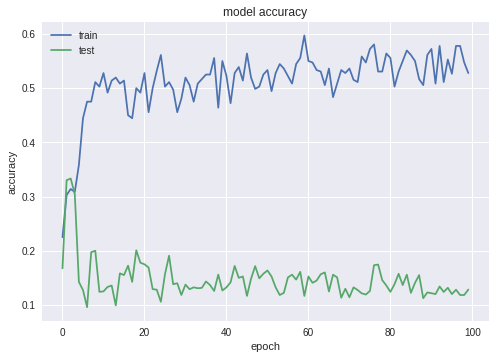

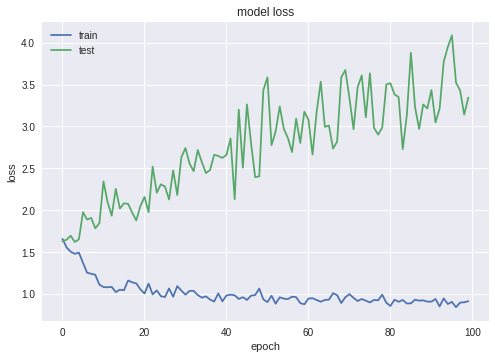

In [200]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist_plot.history['acc'])
plt.plot(hist_plot.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_plot.history['loss'])
plt.plot(hist_plot.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()